# Projekt - Analiza cen wynajmu z serwisu AirBnb w Nowym Jorku w 2019r.

Link do zbioru danych:

https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data?resource=down

Skład Grupy

- Paweł Wira 245725
- Krystian Gumuliński 250625
- Konrad Woźniak 232576

## Czym jest AirBnb?

AirBnb to serwis internetowy mający swoją siedzibę w San Francisco, w Kalifornii, który umożliwia wynajem lokali od osób prywatnych. Platforma powstała w 2008 roku przez Braiana Chesky'ego, Nathana Blecharczyka i Joe Gebbia. Portal Airbnb zrzesza miliony osób, chcące wynająć swoje domy. Aktualnie serwis obejmuje ponad 81000 miast z 191 różnych krajów na świecie. AirBnb jest skrótem od AirBedandBreakfast.com.

Polityka przedsiębiorstwa jest uważana przez niektóre grupy za dość kontrowersyjną. Firma była krytykowana przez osoby najmujące za umożliwienie wynajmującym użytkownikom podwyżek czynszów za domy. Konkuruje też bezpośrednio z branżą hotelarską, która zarzuca firmie brak regulacji prawnych. Część hoteli jednak uległa i wystawiła swoje ogłoszenia na platformie, która pobiera opłaty za wystawione oferty mieszkaniowe.

## Cel projektu

Celem projektu jest analiza zbioru danych, w którym znajdują się dane ofert z serwisu Airbnb dla miasta Nowy Jork z roku 2019. Analiza dotyczy zjawisk takich jak korelacja między cenami, standardem mieszkaniowym czy lokalizacją w odległości od najatrakcyjniejszych miejsc miasta. Dodatkowo dotyczy także zależności pomiędzy osobami wynajmującymi dużą liczbę mieszkań a osobami prywatnymi. Po wykonanej analizie zbioru związanego z AirBnb chcielibyśmy, dokonać pobrania danych związanych z przestępczością w Nowym Jorku i dokonać sprawdzenia czy ów problem koreluje z parametrami ogłoszeń.

## Zbiór danych użyty w projekcie

Zbiór danych potrzebny do realizacji projektu został pobrany z serwisu kaggle.com i został zaczerpnięty ze strony insideairbnb.com. 

Dane zawierają informację między innymi o lokalizacji i dzielnicach ogłoszeń, o cenach, rodzajach mieszkań czy też liczby dostępnych dni w roku. Zbiór danych może pomóc wskazać cechy osób wynajmujących i obszarów wynajmu oraz jest stworzony z myślą o przyszłych prognozach obrazujących preferencje wynajmu klientów w stosunku do poszczególnych okręgów.

## Podział Administacyjny Nowy Jork

Nowy Jork dzieli się na pięć okręgów, określanych mianem boroughs. Każdy z nich pokrywa się z odpowiednim hrabstwem stanu Nowy Jork. Na terenie pięciu okręgów wyróżnić można setki mniejszych dzielnic, z których wiele posiada własną historię i specyfikę. Jeśli każde z boroughs byłoby niezależnym miastem, cztery z nich (Brooklyn, Queens, Manhattan i Bronx) należałyby do najludniejszych miast w Stanach Zjednoczonych.

- Manhattan (hrabstwo Nowy Jork; populacja w 2019 roku: 1 628 706) – najgęściej zaludniona dzielnica; na jej terenie znajduje się Central Park, World Trade Center i większość nowojorskich wieżowców, stanowi finansowe centrum miasta i siedzibę wielu korporacji, kwatery głównej ONZ, kilku uniwersytetów i licznych kulturowych atrakcji.

- Bronx (hrabstwo Bronx; populacja w 2019 roku: 1 418 207) – najdalej na północ wysunięty okręg Nowego Jorku, siedziba Yankee Stadium (domowego stadionu drużyny New York Yankees) i największej spółdzielni mieszkaniowej w Stanach Zjednoczonych – Co-op City.

- Brooklyn (hrabstwo Kings; populacja w 2019 roku: 2 559 903) – położony w zachodniej części Long Island, najbardziej zaludniony ze wszystkich boroughs; niezależne miasto do 1898 roku. Brooklyn znany jest ze swojej kulturowej, społecznej i etnicznej różnorodności, niezależnej sceny artystycznej, specyfiki poszczególnych dzielnic oraz wyjątkowego zróżnicowania architektonicznego.

- Queens (hrabstwo Queens; populacja w 2019 roku: 2 253 858) – terytorialnie największy borough i najbardziej zróżnicowane etnicznie hrabstwo w Stanach Zjednoczonych. W odróżnieniu jednak od Nowego Jorku, Brooklynu i Bronxu, Queens nie ma statusu odrębnego City. Powstałe z kilkunastu małych miasteczek i wiosek założonych przez Holendrów, obecnie Queens stanowi przede wszystkim obszar mieszkalny dla przedstawicieli klasy średniej.

- Staten Island (hrabstwo Richmond; populacja w 2019 roku: 476 143) – ma najbardziej podmiejski charakter spośród wszystkich pięciu dzielnic Nowego Jorku. Staten Island połączona jest z Brooklynem przez Verrazano-Narrows Bridge, zaś z Manhattanem przez darmowy prom Staten Island Ferry. Staten Island Ferry jest jedną z najpopularniejszych atrakcji turystycznych w Nowym Jorku, jako że zapewnia widok na Statuę Wolności, Wyspę Ellis i dolny Manhattan.

![](img/picture.jpg)

# Implementacja

## Import niezbędnych bilbiotek

Podczas implementacji należy zaimportować odpowiednie biblioteki umożliwiające dalszą pracę przy analizy danych. Zaimportowane zostały podstawowe biblioteki języka Python takie jak np. biblioteka umożliwiająca obliczenia na macierzach, biblioteka pomagająca analizie danych czy biblioteka wizualizująca wyniki na wykresach.

In [1]:
#Import niezbędnych bibliotek
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import folium.plugins
import warnings
from sklearn import preprocessing, model_selection
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error

warnings.filterwarnings('ignore')

## Wczytywanie danych

Pierwszym krokiem realizacji projektu analizy wynajmu mieszkań na podstawie serwisu AirBnb jest zrozumienie danych i wartości występujących w poszczególnych komórkach. Poniżej można zaobserwować rodzaj informacji i jej poszczególny typ.

In [2]:
df = pd.read_csv("data/AB_NYC_2019.csv")
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Opis kolumn:
- name - Nazwa obiektu 
- host_id - Numer identyfikacyjny wystawiającego ogłoszenie 
- neighbourhood_group - Nazwa okręgu w Nowym Jorku 
- neighbourhood - Nazwa dzielnic w danym okręgu w Nowym Jorku 
- latitude - Szerokość geograficzna longitude - Długość geograficzna
- room_type - Typ wynajmowanego obiektu 
- price - Cena 
- minimum_nights - Minimalna liczba nocy dla danego obiektu, które są określone przez wynajmującego 
- number_of_reviews - Liczba recenzji danego obiektu 
- reviews_per_month - Liczba recenzji danego obiektu przez miesiąc
- calculated_host_listing_count - Liczba wystawionych obiektów na wynajem przez tego użytkownika serwisu 
- availability_365 - Liczba dni w których dany obiekt jest dostępny do wynajęcia

In [3]:
# Liczba wierszy
len(df)

48895

Zbiór danych składa się z 16 kolumn i 48895 wierszy, który zostanie wykorzystany do dalszej eksploracji.

In [4]:
# Wyświetlenie pierwszych 5 wierszy
df["price_per_night"] = df.apply(lambda row: int(row.price/row.minimum_nights), axis=1)
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_per_night
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,149
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,225
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,50
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,89
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,8


In [5]:
n_df = df[['neighbourhood_group', 'price_per_night', 'room_type']]
n_df_Brooklyn = n_df[n_df['neighbourhood_group'] == 'Brooklyn'].reset_index(drop=True)
n_df_Manhattan = n_df[n_df['neighbourhood_group'] == 'Manhattan'].reset_index(drop=True) 
n_df_Queens = n_df[n_df['neighbourhood_group'] == 'Queens'].reset_index(drop=True) 
n_df_Staten_Island = n_df[n_df['neighbourhood_group'] == 'Staten Island'].reset_index(drop=True) 
n_df_Bronx = n_df[n_df['neighbourhood_group'] == 'Bronx'].reset_index(drop=True) 

In [6]:
#wszystkie ofarty dzielnic w danym okręgu
d_df = df[['neighbourhood_group' ,'neighbourhood', 'price_per_night' , 'room_type']]
d_df_Brooklyn = d_df[d_df['neighbourhood_group'] == 'Brooklyn'].reset_index(drop=True) 
d_df_Manhattan = d_df[d_df['neighbourhood_group'] == 'Manhattan'].reset_index(drop=True)
d_df_Queens = d_df[d_df['neighbourhood_group'] == 'Queens'].reset_index(drop=True)
d_df_Staten_Island = d_df[d_df['neighbourhood_group'] == 'Staten Island'].reset_index(drop=True)
d_df_Bronx = d_df[d_df['neighbourhood_group'] == 'Bronx'].reset_index(drop=True)

#nazwy wszystkich dzielnic w okręgu
dd_df_Brooklyn = d_df_Brooklyn['neighbourhood'].drop_duplicates()
dd_df_Manhattan = d_df_Manhattan['neighbourhood'].drop_duplicates()
dd_df_Queens = d_df_Queens['neighbourhood'].drop_duplicates()
dd_df_Staten_Island = d_df_Staten_Island['neighbourhood'].drop_duplicates()
dd_df_Bronx = d_df_Bronx['neighbourhood'].drop_duplicates()


# Transformacja i czyszczenie danych

Proces transformacji i czyszczenia danych składa się z wszelkich operacji, które dostosują treść i format danych do naszych potrzeb. Dla naszego zbioru danych na samym wstępie dokonamy sprawdzenia, czy w zbiorze występują puste rubryki.

In [7]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
price_per_night                       0
dtype: int64

Następnym krokiem jest sprawdzenie czy dany wiersz jest powielany w zbiorze

In [8]:
df.duplicated().sum()

0

Dokonujemy zastąpienia wartości null w kolumnie reviews_per_month liczbą 0, gdyż wartość null została zapisana w wyniku braku wyświetleń

In [9]:
df.fillna({'reviews_per_month':0}, inplace=True)

Dla wierszy gdzie kolumna name nie ma wartości dajemu NONE

In [10]:
df.fillna({'name':'NONE'}, inplace=True)

In [11]:
df['last_review'] = pd.to_datetime(df['last_review'])
df.fillna({'last_review':np.datetime64('1990-01-01')}, inplace=True)

W zbiorze danych występują kolumny, które są nam zbędne w procesie analizy danych:

Kolumny do usunięcia:

- id - czyli unikalny numer dla danego ogłoszenia,
- host_name - imię osoby wystawiającej, które jest równoważne z tabelą host_id
- last_review - informacja, która nie będzie przydatna w procesie analizy

In [12]:
df.drop(['id','host_name'], axis=1, inplace=True)

Ostatnim krokiem jest ponowne sprawdzenie czy w zbiorze występują jeszcze puste rubryki, które mogą negatywnie wpływać na proces analizowania poszczególnych danych

In [13]:
df.isnull().sum()

name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
price_per_night                   0
dtype: int64

In [14]:
df.dtypes

name                                      object
host_id                                    int64
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
price_per_night                            int64
dtype: object

# Eksploracja i Wizualizacja danych

Najpierw zamieniamy typy danych ze String na int poprzez wykorzystanie LabelEncoder

In [15]:
le = preprocessing.LabelEncoder()
hrabstwo = le.fit_transform(df["neighbourhood_group"])
hrabstwo_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
hrabstwo_mapping_reversed = {v: k for k, v in hrabstwo_mapping.items()}
print(hrabstwo_mapping)

{'Bronx': 0, 'Brooklyn': 1, 'Manhattan': 2, 'Queens': 3, 'Staten Island': 4}


In [16]:
dzielnica = le.fit_transform(list(df["neighbourhood"]))
dzielnica_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
dzielnica_mapping_reversed = {v: k for k, v in dzielnica_mapping.items()}

df = df[df["price"] >= 30]
#print(dzielnica_mapping)

In [17]:
#typ_pokoju = le.fit_transform(list(df["room_type"]))
#typ_pokoju_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
#typ_pokoju_mapping_reversed = {v: k for k, v in typ_pokoju_mapping.items()}
#print(typ_pokoju_mapping)

Pierwszym krokiem badania naszego zbioru danych jest wyświetlenie macierzy korelacji, która umożliwia nam określenie w jakim stopniu poszczególne cechy są ze sobą powiązane

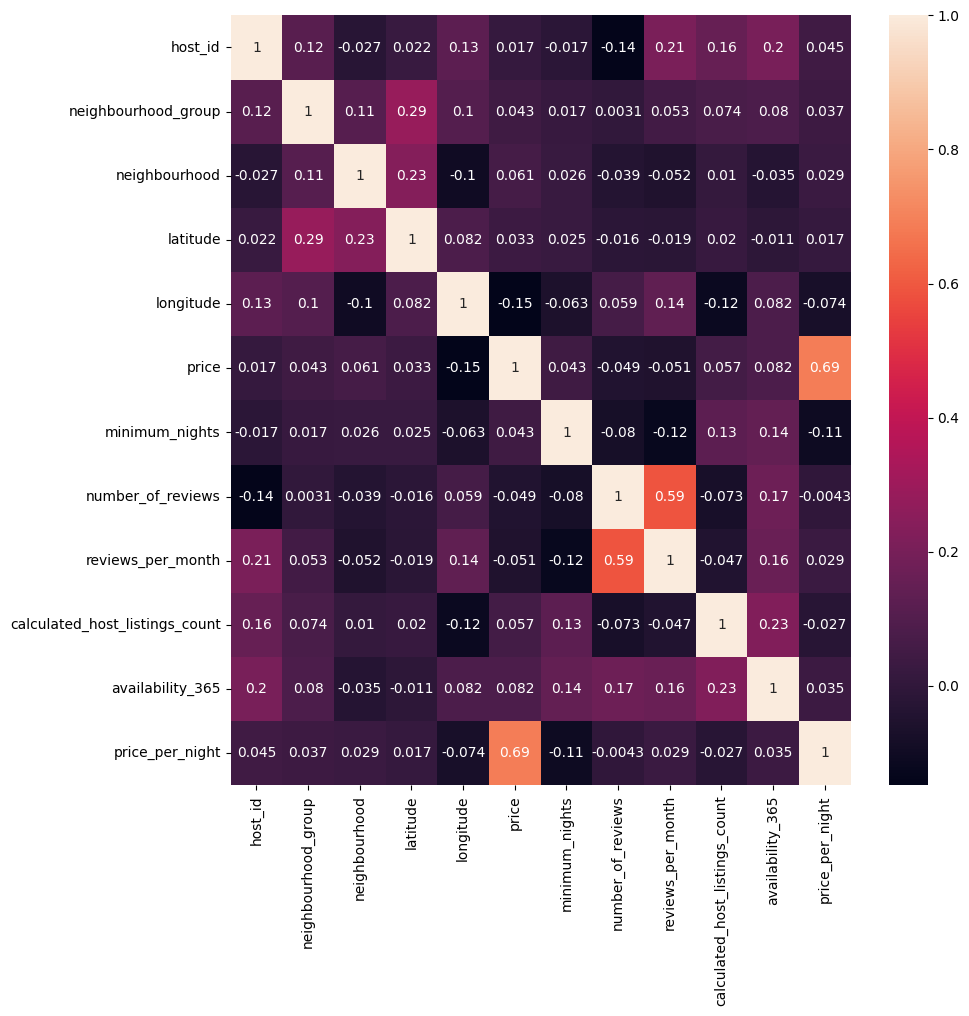

In [18]:
df["neighbourhood"] = df["neighbourhood"].map(dzielnica_mapping)
df["neighbourhood_group"] = df["neighbourhood_group"].map(hrabstwo_mapping)
#df["room_type"] = df["room_type"].map(typ_pokoju_mapping)

plt.figure(figsize=(10,10))
ax = sns.heatmap(df.corr(),annot=True)

Z powyższe mapy cieplnej wnioskujemy, że poszczególne dane nie są ze sobą powiązane w dużym stopniu oprócz, możemy wyróżnić następującą korelacje:

- reviews_per_month/number_of_reviews - wysoki współczynnik jest wynikiem skalowania drugiej wartości przez liczbę miesięcy w których ogłoszenie było aktywne

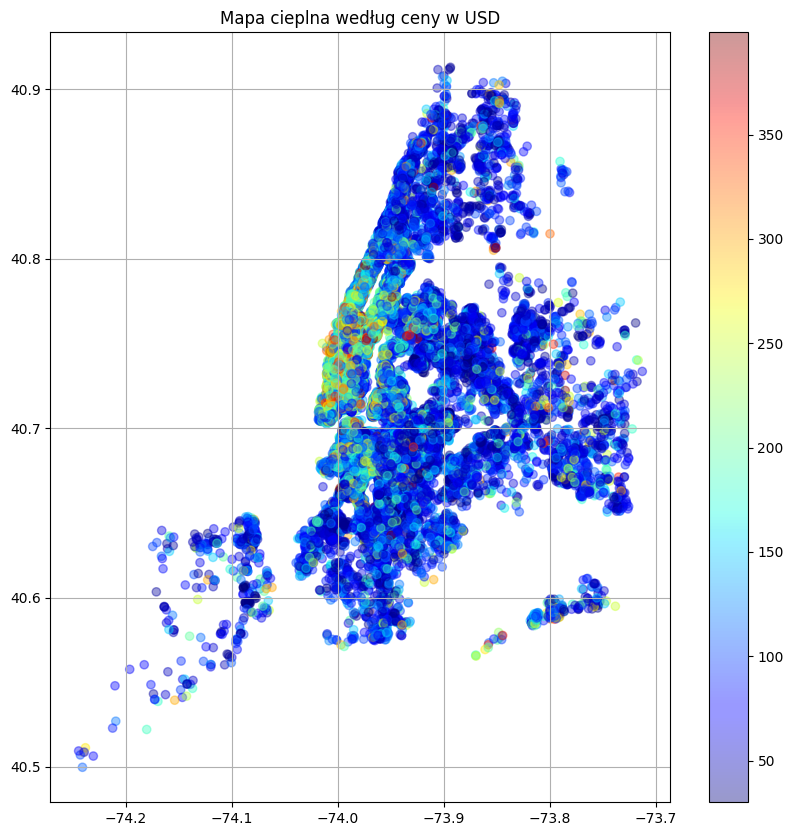

In [19]:

FILTER_PRICE_VALUE = 400
sub_airbnb = df[df.price < FILTER_PRICE_VALUE]
fig, ax = plt.subplots(figsize=(10, 10))
cmap = plt.get_cmap('jet')
c = sub_airbnb.price 
alpha = 0.5 
label = "airbnb"
price_heatmap = ax.scatter(sub_airbnb.longitude, sub_airbnb.latitude, label=label, c=c,
 cmap=cmap, alpha=0.4)
plt.title("Mapa cieplna według ceny w USD")
plt.colorbar(price_heatmap)
plt.grid(True)
plt.show()


Powyższa mapa cieplna obrazuje nam, że w okręgu Manhattan znajdują się najdroższe ogłoszenia, a w okręgu Staten Island jest ich najmniej

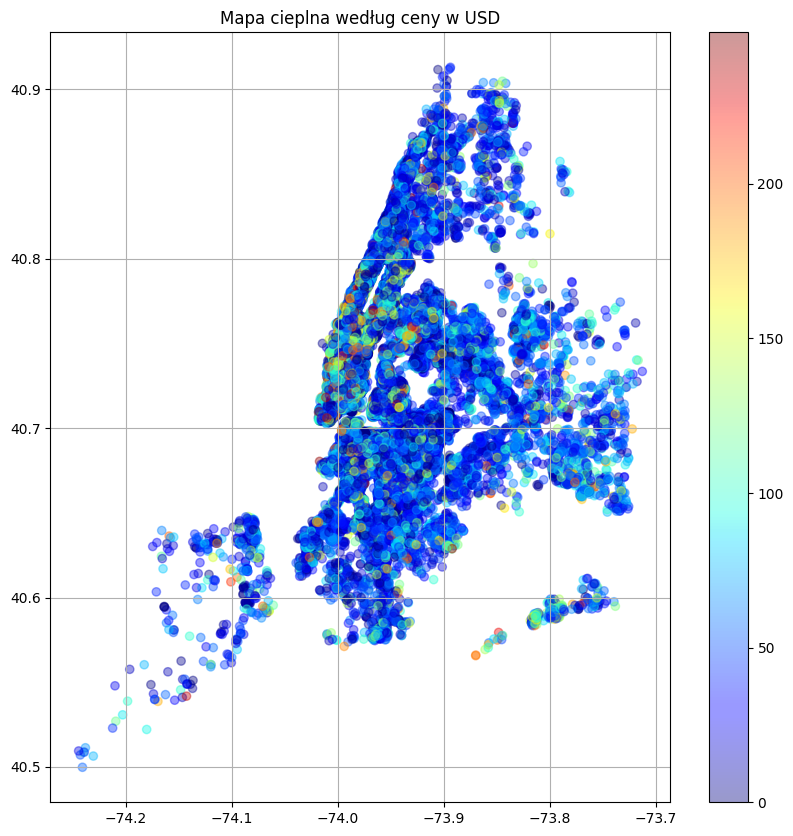

In [20]:
FILTER_PRICE_VALUE = 250
sub_airbnb = df[df.price_per_night < FILTER_PRICE_VALUE]
fig, ax = plt.subplots(figsize=(10, 10))
cmap = plt.get_cmap('jet')
c = sub_airbnb.price_per_night 
alpha = 0.5 
label = "airbnb"
price_heatmap = ax.scatter(sub_airbnb.longitude, sub_airbnb.latitude, label=label, c=c,
 cmap=cmap, alpha=0.4)
plt.title("Mapa cieplna według ceny w USD")
plt.colorbar(price_heatmap)
plt.grid(True)
plt.show()

## Top 5 wynajmujących pod względem liczby ofert

Zastosowanie rankingu dotyczącego liczby wystawionych ogłoszeń przez jednego wynajmującego pomaga dostrzec skalę oraz charakter korzystania z portalu przez użytkownika. Pozwala też na wyodrębnienie najwyższych wyników portalu pod tym względem w porównaniu do reszty wyników.

In [21]:
top_hosts = (pd.DataFrame(df.host_id.value_counts())).head(5)
top_hosts.columns=['Liczba ofert']
top_hosts['host_id'] = top_hosts.index
top_hosts.reset_index(drop=True, inplace=True)
top_hosts

,Liczba ofert,host_id
0,327,219517861
1,232,107434423
2,121,30283594
3,99,137358866
4,96,12243051


In [22]:
new_dataframe = df[['host_id', 'number_of_reviews', 'latitude', 'longitude', 'price_per_night', 'room_type']]
top_hosts_count_reviews = new_dataframe[(new_dataframe['host_id'] == 37312959) | (new_dataframe['host_id'] == 107434423) | (new_dataframe['host_id'] == 30283594) | (new_dataframe['host_id'] == 137358866) | (new_dataframe['host_id'] == 16098958)].reset_index(drop=True) 
rev_top_group = top_hosts_count_reviews.groupby('host_id', as_index = False)['number_of_reviews'].sum()
rev_top_group


,host_id,number_of_reviews
0,16098958,138
1,30283594,65
2,37312959,2273
3,107434423,29
4,137358866,87


Użytkownik na najwyższym poziomie rankingu ofert wystawił dokładnie 327 mieszkań, jednak jest to odosobniony przypadek, ponieważ już drugi użytkownik w rankingu miał tych ofert o prawie 100 mniej. Jedynie 4 użytkowników z serwisu wystawiało ponad 100 ofert, więc zdecydowana większość wynajmujących osób nie przekroczy tej bariery.

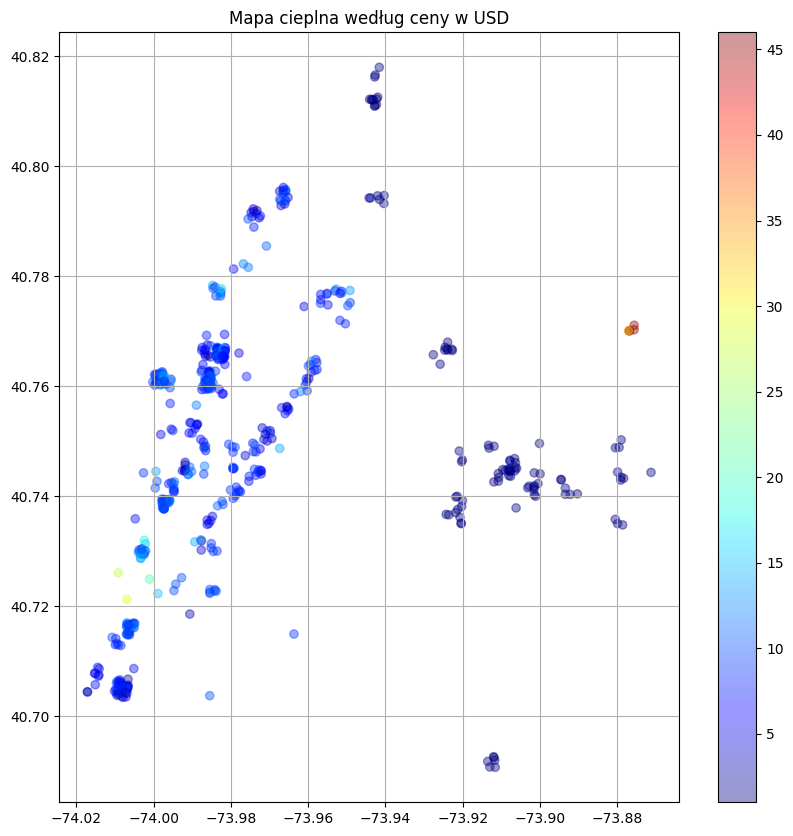

In [23]:
FILTER_PRICE_VALUE = 250
sub_airbnb = top_hosts_count_reviews[top_hosts_count_reviews.price_per_night < FILTER_PRICE_VALUE]
fig, ax = plt.subplots(figsize=(10, 10))
cmap = plt.get_cmap('jet')
c = sub_airbnb.price_per_night 
alpha = 0.5 
label = "airbnb"
price_heatmap = ax.scatter(sub_airbnb.longitude, sub_airbnb.latitude, label=label, c=c,
 cmap=cmap, alpha=0.4)
plt.title("Mapa cieplna według ceny w USD")
plt.colorbar(price_heatmap)
plt.grid(True)
plt.show()

In [24]:
map = folium.Map([40.7128,-74.0060],zoom_start=11)
folium.plugins.HeatMap(top_hosts_count_reviews[['latitude','longitude']].dropna(),
                       radius=8).add_to(map)
display(map)


()

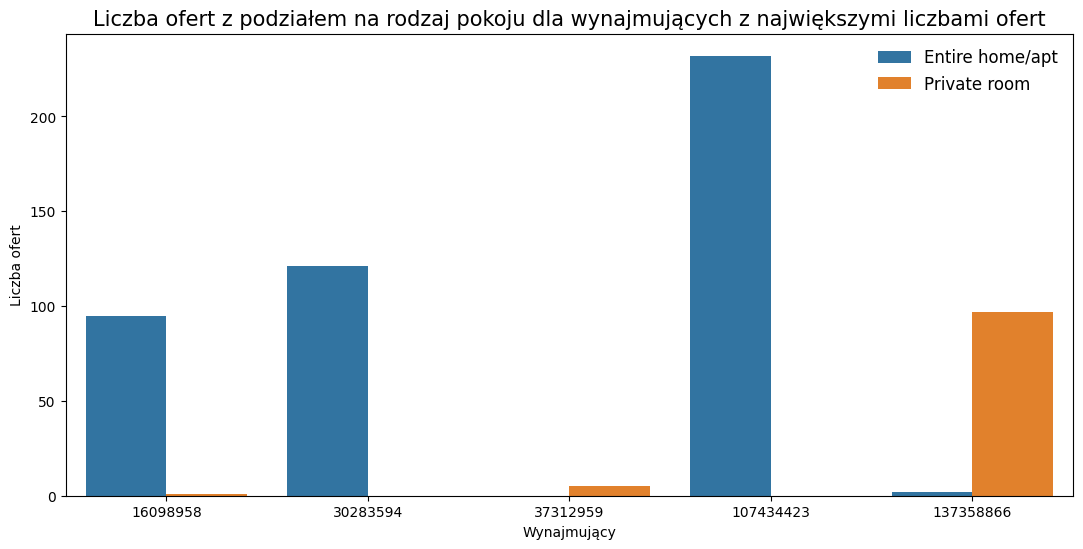

In [25]:
plt.figure(figsize=(13,6))
sns.countplot(data=top_hosts_count_reviews, x='host_id', hue='room_type')
plt.title('Liczba ofert z podziałem na rodzaj pokoju dla wynajmujących z największymi liczbami ofert', fontsize=15)
plt.xlabel('Wynajmujący')
plt.ylabel("Liczba ofert")
plt.legend(frameon=False, fontsize=12) 
()

## Top 5 wynajmujących pod względem liczby recenzji

In [26]:
reviews_top = pd.DataFrame(df.groupby('host_id').sum()['number_of_reviews'])
reviews_top_top = (reviews_top.sort_values('number_of_reviews',ascending=False)).head(5)
reviews_top_top.columns = ['Liczba recenzji']
reviews_top_top['Host_id'] = reviews_top_top.index
reviews_top_top.reset_index(drop=True, inplace=True)
reviews_top_top

,Liczba recenzji,Host_id
0,2273,37312959
1,2205,344035
2,2017,26432133
3,1971,35524316
4,1818,40176101


## Top 5 Okręgi pod względem liczby ofert

Wyodrębnienie liczby ogłoszeń ze względu na dzielnice pomaga zaobserwować "popularność" okręgów Nowego Jorku. Podział liczby ogłoszeń na okręgi pozwala stwierdzić, które z nich są najbardziej przyjazne potencjalnym najemcom. Oznacza to także atrakcyjność danego obszaru, ponieważ większa sieć mieszkań do wynajęcia może współgrać z większym skupiskiem ludności danej przestrzeni, co także może przełożyć się na bogatsze i bezpieczniejsze warunki życiowe ludności.

In [27]:
df["neighbourhood_group"] = df["neighbourhood_group"].map(hrabstwo_mapping_reversed)
df["neighbourhood"] = df["neighbourhood"].map(dzielnica_mapping_reversed)

In [28]:
top_neigh = pd.DataFrame(df['neighbourhood_group'].value_counts().head(5))
top_neigh.columns=['Liczba ofert']
top_neigh['Okręg'] = top_neigh.index
top_neigh.reset_index(drop=True, inplace=True)
top_neigh

,Liczba ofert,Okręg
0,21614,Manhattan
1,19894,Brooklyn
2,5584,Queens
3,1035,Bronx
4,364,Staten Island


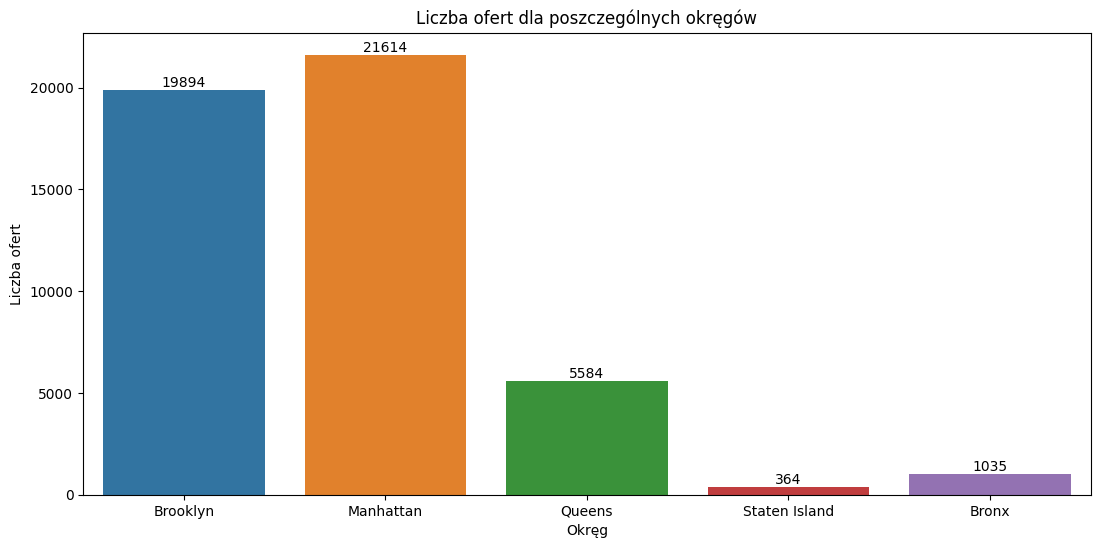

In [29]:
f,ax = plt.subplots(figsize=(13,6))
ax = sns.countplot(x=df.neighbourhood_group)
ax.bar_label(ax.containers[0])
plt.xlabel("Okręg")
plt.ylabel("Liczba ofert")
plt.title("Liczba ofert dla poszczególnych okręgów")
plt.show()

W aspekcie liczby ofert podzielonej na okręgi przoduje Manhattan, jednak zaraz za nim jest Brooklyn z minimalną różnicą ofert. Między tymi dwoma okręgami jest zauważalna mała różnica, natomiast spora różnica pomiędzy względem pozostałych okręgów. Queens plasujące się na trzecim miejscu posiada prawie czterokrotnie mniejszą liczbę ofert od przodujących okręgach. Ostatnie dwa okręgi mają w porównaniu do innych przestrzeni Nowego Jorku niewielką liczbę ofert na portalu AirBnb.

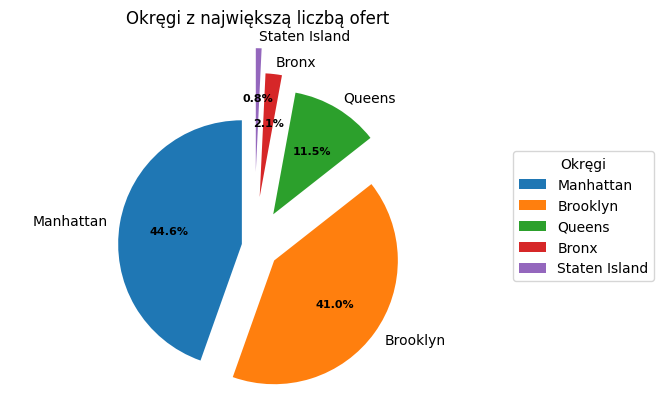

In [30]:
labels = df.neighbourhood_group.value_counts().index
sizes = df.neighbourhood_group.value_counts().values
explode = (0.1, 0.2, 0.3, 0.4, 0.6)

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
                                   shadow=False, startangle=90)
ax.axis('equal')
ax.set(title="Okręgi z największą liczbą ofert")
ax.legend(wedges, labels,
          title="Okręgi",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")
plt.show()

Wykres kołowy pozwala na zobrazowanie wielkości zajmowanego "kawałka tortu" przez dwa największe okręgi pod względem liczby ofert mieszkaniowych na serwisie AirBnb. Razem zajmują ponad 85% wszystkich ofert portalu. Swoją niszę ma także Queens, które zajmuje 11,6% i plasuje się na pozycji trzeciej. Bronx i Staten Island praktycznie nie liczą się w tym aspekcie, a liczba ogłoszeń może świadczyć o ich ekskluzywności. Jeśli dana osoba szukałaby oferty w tych okolicach musiałaby liczyć się z trudnością w odnalezieniu pasującego ogłoszenia.

## Top 5 dzielnic w każdym okręgu pod względem liczby ofert

### Brooklyn

In [31]:
top_dzielnice_Brooklyn = (pd.DataFrame(d_df_Brooklyn['neighbourhood'].value_counts())).head(5)
top_dzielnice_Brooklyn.columns=['Liczba ofert']
top_dzielnice_Brooklyn['Dzielnica'] = top_dzielnice_Brooklyn.index
top_dzielnice_Brooklyn.reset_index(drop=True, inplace=True)
top_dzielnice_Brooklyn

,Liczba ofert,Dzielnica
0,3920,Williamsburg
1,3714,Bedford-Stuyvesant
2,2465,Bushwick
3,1564,Crown Heights
4,1115,Greenpoint


In [32]:
#Dzielnice Brooklyn
cena = df[df['neighbourhood_group'] == 'Brooklyn']
#Williamsburg
cena_Williamsburg = cena.loc[cena['neighbourhood'] == 'Williamsburg']
średnia_cena_Williamsburg = cena_Williamsburg['price_per_night'].mean()
#Bedford-Stuyvesant
cena_Bedford_Stuyvesant = cena.loc[cena['neighbourhood'] == 'Bedford-Stuyvesant']
średnia_cena_Bedford_Stuyvesant = cena_Bedford_Stuyvesant['price_per_night'].mean()
#Bushwick
cena_Bushwick = cena.loc[cena['neighbourhood'] == 'Bushwick']
średnia_cena_Bushwick = cena_Bushwick['price_per_night'].mean()
#Crown Heights
cena_Crown_Heights = cena.loc[cena['neighbourhood'] == 'Crown Heights']
średnia_cena_Crown_Heights = cena_Crown_Heights['price_per_night'].mean()
#Greenpoint
cena_Greenpoint = cena.loc[cena['neighbourhood'] == 'Greenpoint']
średnia_cena_Greenpoint = cena_Greenpoint['price_per_night'].mean()

#Tabela
tabela_brooklyn = [['Williamsburg', średnia_cena_Williamsburg],['Bedford-Stuyvesant', średnia_cena_Bedford_Stuyvesant],['Bushwick', średnia_cena_Bushwick],['Crown Heights', średnia_cena_Crown_Heights],['Greenpoint', średnia_cena_Greenpoint]]
df_tabela_brooklyn = pd.DataFrame(tabela_brooklyn)
df_tabela_brooklyn.columns = 'Dzielnica', 'Średnia cena za noc'
df_tabela_brooklyn

,Dzielnica,Średnia cena za noc
0,Williamsburg,64.243865
1,Bedford-Stuyvesant,50.834195
2,Bushwick,41.301359
3,Crown Heights,52.432187
4,Greenpoint,59.975676


Liczba ofert dla okręgu Brooklyn jest największa dla dwóch dzielnic tj. Williamsburg i sąsiadującej jej dzielnicy Bedford-Stuyvesant, najprawdopodobniej jest to wynikiem popularności dzielnicy Williamsburg, która według portali przyciąga głównie młodych ludzi poprzez, stylowe butiki, modne kawiarnie i tętniące życiem restauracje. Ponadto w tej dzielnicy ludzie często spędzają czas w celu podziwiania panoramy Manhattanu. Powyższe powody świadczą o średniej cenie za noc, która jest najwyższa z najpopularniejszych. Dzielnica ta jest również znana z pięknych budynków z przełomu XIX i XX wieku i widoku na rzekę East River i Manhattan.

### Manhattan

In [33]:
top_dzielnice_Manhattan = (pd.DataFrame(d_df_Manhattan['neighbourhood'].value_counts())).head(5)
top_dzielnice_Manhattan.columns=['Liczba ofert']
top_dzielnice_Manhattan['Dzielnica'] = top_dzielnice_Manhattan.index
top_dzielnice_Manhattan.reset_index(drop=True, inplace=True)
top_dzielnice_Manhattan

,Liczba ofert,Dzielnica
0,2658,Harlem
1,1971,Upper West Side
2,1958,Hell's Kitchen
3,1853,East Village
4,1798,Upper East Side


In [34]:
#Dzielnice Manhattan
cena = df[df['neighbourhood_group'] == 'Manhattan']
#Harlem
cena_Harlem = cena.loc[cena['neighbourhood'] == 'Harlem']
średnia_cena_Harlem = cena_Harlem['price_per_night'].mean()
#Upper West Side
cena_Upper_West_Side = cena.loc[cena['neighbourhood'] == 'Upper West Side']
średnia_cena_Upper_West_Side = cena_Upper_West_Side['price_per_night'].mean()
#Hell's Kitchen
cena_Hells_Kitchen = cena.loc[cena['neighbourhood'] == "Hell's Kitchen"]
średnia_cena_Hells_Kitchen = cena_Hells_Kitchen['price_per_night'].mean()
#East Village
cena_East_Village = cena.loc[cena['neighbourhood'] == 'East Village']
średnia_cena_East_Village = cena_East_Village['price_per_night'].mean()
#Upper East Side
cena_Upper_East_Side = cena.loc[cena['neighbourhood'] == 'Upper East Side']
średnia_cena_Upper_East_Side = cena_Upper_East_Side['price_per_night'].mean()

#Tabela
tabela_Manhattan = [['Harlem', średnia_cena_Harlem],['Upper West Side', średnia_cena_Upper_West_Side],["Hell's Kitchen", średnia_cena_Hells_Kitchen],['East Village', średnia_cena_East_Village],['Upper East Side', średnia_cena_Upper_East_Side]]
df_tabela_Manhattan = pd.DataFrame(tabela_Manhattan)
df_tabela_Manhattan.columns = 'Dzielnica', 'Średnia cena za noc'
df_tabela_Manhattan

,Dzielnica,Średnia cena za noc
0,Harlem,56.198110
1,Upper West Side,83.676486
2,Hell's Kitchen,92.709611
3,East Village,86.233261
4,Upper East Side,82.467706


Harlem to dzielnica od dawna znana z kameralnych klubów jazzowych, dziedzictwa kultury afroamerykańskiej oraz miejsc oferujących dania typu soul food, która przyciąga zróżnicowane kulturowo tłumy turystów i mieszkańców. Intensywne życie nocne toczy się w modnych restauracjach, stylowych klubach i popularnych barach.  Jeśli chodzi o najwyższą średnią cenę za noc dzielnicy Hell's Kitchen, prawdopodobnie jest to spowodowane przez położenie tuż obok Central Parku oraz Times Square.

### Queens

In [35]:
top_dzielnice_Queens = (pd.DataFrame(d_df_Queens['neighbourhood'].value_counts())).head(5)
top_dzielnice_Queens.columns=['Liczba ofert']
top_dzielnice_Queens['Dzielnica'] = top_dzielnice_Queens.index
top_dzielnice_Queens.reset_index(drop=True, inplace=True)
top_dzielnice_Queens

,Liczba ofert,Dzielnica
0,900,Astoria
1,537,Long Island City
2,426,Flushing
3,423,Ridgewood
4,363,Sunnyside


In [36]:
#Dzielnice Queens
cena = df.loc[df['neighbourhood_group'] == 'Queens']
#Astoria
cena_Astoria = cena.loc[cena['neighbourhood'] == 'Astoria']
średnia_cena_Astoria = cena_Astoria['price_per_night'].mean()
#Long Island City
cena_Long_Island_City = cena.loc[cena['neighbourhood'] == 'Long Island City']
średnia_cena_Long_Island_City = cena_Long_Island_City['price_per_night'].mean()
#Flushing
cena_Flushing = cena.loc[cena['neighbourhood'] == "Flushing"]
średnia_cena_Flushing = cena_Flushing['price_per_night'].mean()
#Ridgewood
cena_Ridgewood = cena.loc[cena['neighbourhood'] == 'Ridgewood']
średnia_cena_Ridgewood = cena_Ridgewood['price_per_night'].mean()
#Sunnyside
cena_Sunnyside = cena.loc[cena['neighbourhood'] == 'Sunnyside']
średnia_cena_Sunnyside = cena_Sunnyside['price_per_night'].mean()

#Tabela
tabela_Queens = [['Astoria', średnia_cena_Astoria],['Long Island City', średnia_cena_Long_Island_City],["Flushing", średnia_cena_Flushing],['Ridgewood', średnia_cena_Ridgewood],['Sunnyside', średnia_cena_Sunnyside]]
df_tabela_Queens = pd.DataFrame(tabela_Queens)
df_tabela_Queens.columns = 'Dzielnica', 'Średnia cena za noc'
df_tabela_Queens

,Dzielnica,Średnia cena za noc
0,Astoria,50.135045
1,Long Island City,69.318436
2,Flushing,61.185714
3,Ridgewood,35.028916
4,Sunnyside,42.136111


Jest to największy okręg w Nowym Jorku. Znajduje się na zachodzie i składa się z kilku małym wysp. Obecnie obszar stale się rozwija. Okręg charakteryzuje się niższą zabudową. Znajdują się tam aż dwa porty lotnicze. W Queens znajduje się jedyne w mieście kasyno. Okręg słynie z zielonych terenów. Jest to idealne miejsce dla amatorów opalania, pływania, jazdy na rowerze oraz gry w golfa. Najliczniejsze dzielnice pod względem liczby ofert znajdują się w sąsiedztwie okręgu Manhattan.

### Staten Island

In [37]:
top_dzielnice_Staten_Island = (pd.DataFrame(d_df_Staten_Island['neighbourhood'].value_counts())).head(5)
top_dzielnice_Staten_Island.columns=['Liczba ofert']
top_dzielnice_Staten_Island['Dzielnica'] = top_dzielnice_Staten_Island.index
top_dzielnice_Staten_Island.reset_index(drop=True, inplace=True)
top_dzielnice_Staten_Island

,Liczba ofert,Dzielnica
0,48,St. George
1,42,Tompkinsville
2,27,Stapleton
3,26,Concord
4,21,Arrochar


In [38]:
#Dzielnice Staten Island
cena = df.loc[df['neighbourhood_group'] == 'Staten Island']
#St. George
cena_St_George = cena.loc[cena['neighbourhood'] == 'St. George']
średnia_cena_St_George = cena_St_George['price_per_night'].mean()
#Tompkinsville
cena_Tompkinsville = cena.loc[cena['neighbourhood'] == 'Tompkinsville']
średnia_cena_Tompkinsville = cena_Tompkinsville['price_per_night'].mean()
#Stapleton
cena_Stapleton = cena.loc[cena['neighbourhood'] == "Stapleton"]
średnia_cena_Stapleton = cena_Stapleton['price_per_night'].mean()
#Concord
cena_Concord = cena.loc[cena['neighbourhood'] == 'Concord']
średnia_cena_Concord = cena_Concord['price_per_night'].mean()
#Arrochar
cena_Arrochar = cena.loc[cena['neighbourhood'] == 'Arrochar']
średnia_cena_Arrochar = cena_Arrochar['price_per_night'].mean()

#Tabela
tabela_Staten_Island = [['St. George', średnia_cena_St_George],['Tompkinsville', średnia_cena_Tompkinsville],["Stapleton", średnia_cena_Stapleton],['Concord', średnia_cena_Concord],['Arrochar', średnia_cena_Arrochar]]
df_tabela_Staten_Island = pd.DataFrame(tabela_Staten_Island)
df_tabela_Staten_Island.columns = 'Dzielnica', 'Średnia cena za noc'
df_tabela_Staten_Island

,Dzielnica,Średnia cena za noc
0,St. George,71.638298
1,Tompkinsville,41.928571
2,Stapleton,58.592593
3,Concord,26.760000
4,Arrochar,59.380952


Dzielnica z najmniejszą liczbą ofert, co prawdopodobnie jest spowodowane jej małą popularnością, jeśli chodzi o turystykę (daleka odległość do największych atrakcji miejskich). Jest to okręg najbardziej jednorodny etnicznie i o najmniejszej liczbie populacji. Przez mieszkańców NY jest traktowany jako wiejska prowincja, mimo że jest gęsto zabudowany. Ceny w dzielnicy St.George mogą wynikać z niskiej konkurencyjności oraz położenia, które daje konsumentowi dobry dojazd na Manhattan oraz bliskość zatoki.

### Bronx

In [39]:
top_dzielnice_Bronx = (pd.DataFrame(d_df_Bronx['neighbourhood'].value_counts())).head(5)
top_dzielnice_Bronx.columns=['Liczba ofert']
top_dzielnice_Bronx['Dzielnica'] = top_dzielnice_Bronx.index
top_dzielnice_Bronx.reset_index(drop=True, inplace=True)
top_dzielnice_Bronx

,Liczba ofert,Dzielnica
0,70,Kingsbridge
1,63,Fordham
2,62,Longwood
3,60,Mott Haven
4,50,Concourse


In [40]:
#Dzielnice Bronx
cena = df.loc[df['neighbourhood_group'] == 'Bronx']
#Kingsbridge
cena_Kingsbridge = cena.loc[cena['neighbourhood'] == 'Kingsbridge']
średnia_cena_Kingsbridge = cena_Kingsbridge['price_per_night'].mean()
#Fordham
cena_Fordham = cena.loc[cena['neighbourhood'] == 'Fordham']
średnia_cena_Fordham = cena_Fordham['price_per_night'].mean()
#Longwood
cena_Longwood = cena.loc[cena['neighbourhood'] == "Longwood"]
średnia_cena_Longwood = cena_Longwood['price_per_night'].mean()
#Mott Haven
cena_Mott_Haven = cena.loc[cena['neighbourhood'] == 'Mott Haven']
średnia_cena_Mott_Haven = cena_Mott_Haven['price_per_night'].mean()
#Concourse
cena_Concourse = cena.loc[cena['neighbourhood'] == 'Concourse']
średnia_cena_Concourse = cena_Concourse['price_per_night'].mean()

#Tabela
tabela_Bronx = [['Kingsbridge', średnia_cena_Kingsbridge],['Fordham', średnia_cena_Fordham],["Longwood", średnia_cena_Longwood],['Mott Haven', średnia_cena_Mott_Haven],['Concourse', średnia_cena_Concourse]]
df_tabela_Bronx = pd.DataFrame(tabela_Bronx)
df_tabela_Bronx.columns = 'Dzielnica', 'Średnia cena za noc'
df_tabela_Bronx

,Dzielnica,Średnia cena za noc
0,Kingsbridge,41.086957
1,Fordham,37.800000
2,Longwood,55.360656
3,Mott Haven,50.016667
4,Concourse,57.360000


Bronx jest to największy okręg pod względem powierzchni w Nowym Jorku i jednocześnie jeden z najbardziej zróżnicowanych okręgów pod względem etnicznym. Dzielnica ta jest znana ze swojej muzyki, jako miejsce narodzin słynnego stylu muzycznego, hip-hopu. Bronx słynie także z wielu parków i ogrodów, w tym z parku rozrywki Yankee Stadium i botanicznego ogrodu Bronx. Jednak atrakcje tego miejsca nie przekładają się na oferty, a mała liczba ofert dla okręgu Bronx może wynikać, z tego iż jest ona owiana złą sławą w wyniku znaczącej przestępczości oraz biedoty. Średnia cena za noc w pięciu najpopularniejszych dzielnicach tego okręgu jest do siebie bardzo zbliżona.

## Top 3 ofert pod względem liczby recenzji

Podział na największą liczbą wyświetleń pozwala na sprawdzenie popularności serwisu oraz jego ofert. Oferta z największą liczbą wyświetleń badanego okresu wynosi dokładnie 629. W takim razie oferty w Nowym Jorku mogą przyciągać do siebie kilkuset użytkowników serwisu.

In [41]:
rev_group = pd.DataFrame(df.groupby('number_of_reviews').sum()['host_id'])
most_reviewed = (rev_group.sort_values('number_of_reviews',ascending=False)).head(3)
most_reviewed.columns = ['Host ID']
most_reviewed['Liczba recenzji'] = most_reviewed.index
most_reviewed.reset_index(drop=True, inplace=True)
most_reviewed


,Host ID,Liczba recenzji
0,47621202,629
1,4734398,607
2,4734398,597


## Top 5 wynajmujących pod względem liczby miesięcznych recenzji

Wyświetlenia ofert serwisu w skali miesięcznej pozwolą na wizualizację popytu użytkowników w mniejszym okresie.

In [42]:
rev_month = pd.DataFrame(df.groupby('host_id').sum()['reviews_per_month'])
rev_month = (rev_month.sort_values('reviews_per_month', ascending=False)).head(5)
rev_month.columns = ['Liczba recenzji na miesiąc']
rev_month['Host_id'] = rev_month.index
rev_month.reset_index(drop=True, inplace=True)
rev_month

,Liczba recenzji na miesiąc,Host_id
0,397.56,219517861
1,111.72,244361589
2,80.63,232251881
3,68.02,26432133
4,62.89,137274917


Widzimy, że jeden z hostów przewyższa poprzedniego ponad 3-krotnie w liczbach recenzji na miesiąc. Może się to dziać z wielu powodów:
- badany host ma bardzo wiele obiektów na wynajem,
- badany host ma bardzo małą liczbę minimalnych nocy w swoich miejscach na wynajem.

Prawda najprawdopodobniej znajduje się gdzieś pomiędzy, dlatego sprawdzimy kilka mieszkań tego hosta oraz określimy ile ich ogólnie posiada i gdzie się znajdują.

In [43]:
top_host_objects = pd.DataFrame(df[["host_id", "name", "price", "price_per_night", "neighbourhood_group", "room_type", "latitude", "longitude", "reviews_per_month", "number_of_reviews", "minimum_nights"]])
top_host_objects = top_host_objects[top_host_objects["host_id"] == 219517861].reset_index(drop=True)
top_host_objects_count = top_host_objects["host_id"].count()
top_host_objects.sort_values("price_per_night", inplace=True, ascending=False)
top_host_objects.head(15)

,host_id,name,price,price_per_night,neighbourhood_group,room_type,latitude,longitude,reviews_per_month,number_of_reviews,minimum_nights
205,219517861,Sonder | Wall Street | Superior 3BR + Rooftop,616,308,Manhattan,Private room,40.70597,-74.01248,2.46,5,2
157,219517861,Sonder | Stock Exchange | Sleek 3BR + Laundry,520,260,Manhattan,Entire home/apt,40.70645,-74.01186,2.43,6,2
70,219517861,Sonder | Stock Exchange | Original 3BR + Lounge,505,252,Manhattan,Entire home/apt,40.70785,-74.01239,1.79,7,2
164,219517861,Sonder | Stock Exchange | Calming 3BR + Laundry,505,252,Manhattan,Entire home/apt,40.70750,-74.01179,3.58,8,2
46,219517861,Sonder | Stock Exchange | Expansive 3BR + Kitchen,503,251,Manhattan,Entire home/apt,40.70631,-74.01098,2.10,7,2
27,219517861,Sonder | Stock Exchange | Calming 3BR + Sofa Bed,503,251,Manhattan,Entire home/apt,40.70645,-74.01203,1.34,5,2
99,219517861,Sonder | Stock Exchange | Sleek 3BR + Lounge,498,249,Manhattan,Entire home/apt,40.70620,-74.01192,2.50,8,2
183,219517861,Sonder | Stock Exchange | Polished 3BR + Kitchen,495,247,Manhattan,Entire home/apt,40.70715,-74.01030,2.50,7,2
131,219517861,Sonder | Stock Exchange | Original 3BR + Kitchen,484,242,Manhattan,Entire home/apt,40.70659,-74.01020,2.00,8,2
179,219517861,Sonder | Stock Exchange | Stunning 3BR + Sofa Bed,474,237,Manhattan,Entire home/apt,40.70729,-74.01095,4.22,9,2


In [44]:
print(f"Liczba obiektów na wynajem: {top_host_objects_count}")

Liczba obiektów na wynajem: 327


In [45]:
top_host_objects["neighbourhood_group"].unique()

array(['Manhattan'], dtype=object)

Przeglądając powyższe wyniki programu widzimy, że ceny tego hosta sięgają wysokich cen za pobyt. Spoglądając na wartości długości i szerokości geograficznej widzimy również, że znajdują się bardzo blisko siebie. Zostanie to zaprezentowane w sposób graficzny na mapie w późniejszym etapie analizy. Widzimy również, że nazwa każdego z obiektów podąża za określonym schematem określonej firmy, a prawdziwy opis ogranicza się tylko do liczby sypialni oraz jakiś element, który autor uważał że wyróżnia ten obiekt spośród innych.


Widzimy również, że pod tego określonego hosta przypisanych jest aż 327 obiektów. Co ciekawe, wszystkie z nich znajdują się na Manhattanie.


Sprawdzimy teraz, jak wygląda rozkład nieruchomości tego hosta.

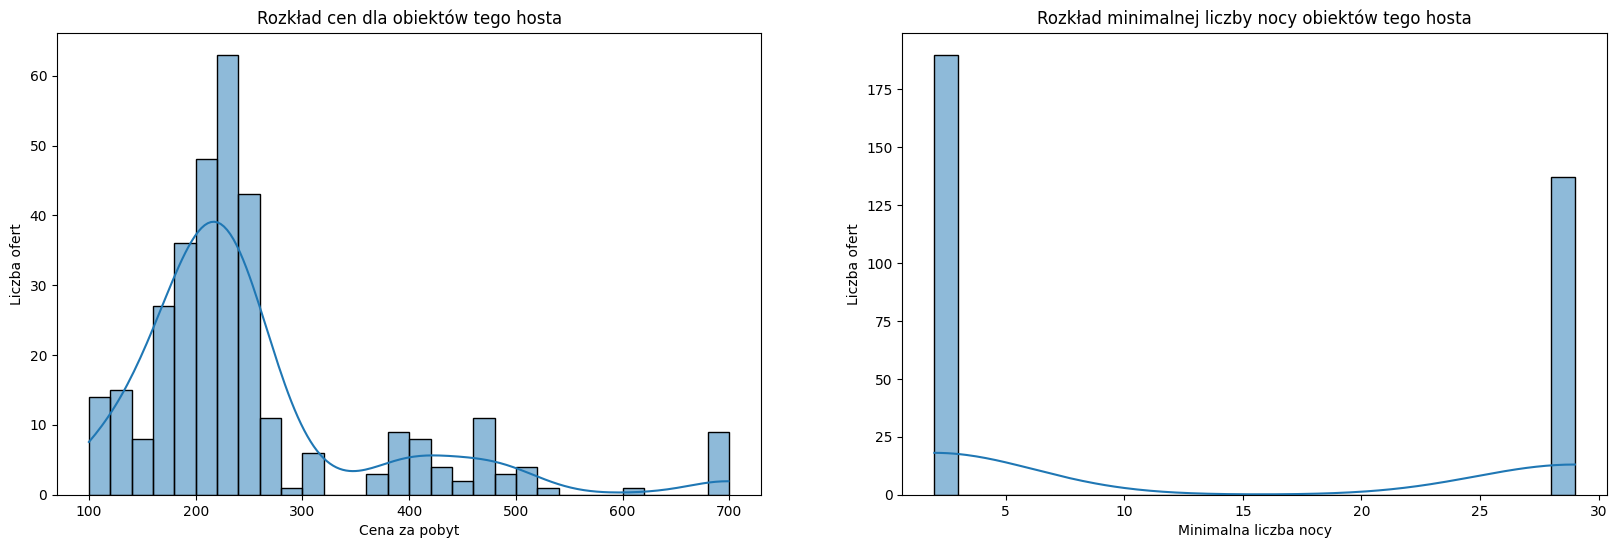

In [46]:
fig, ax = plt.subplots(1 ,2, figsize=(20, 6))
ax[0].set_title("Rozkład cen dla obiektów tego hosta", fontsize=12)
ax[0].set_xlabel("Cena za pobyt")
ax[0].set_ylabel("Liczba ofert")
ax[1].set_title("Rozkład minimalnej liczby nocy obiektów tego hosta", fontsize=12)
ax[1].set_xlabel("Minimalna liczba nocy")
ax[1].set_ylabel("Liczba ofert")
sns.histplot(data=top_host_objects, x="price", kde=True, binwidth=20, ax=ax[0])
sns.histplot(data=top_host_objects, x="minimum_nights", kde=True, binwidth=1, ax=ax[1]);

In [47]:
room = top_host_objects[top_host_objects["room_type"] == "Private room"].room_type.count()
entire_apt = top_host_objects[top_host_objects["room_type"] == "Entire home/apt"].room_type.count()
print(f"Unikalne wartości minimum_nights: {top_host_objects.minimum_nights.unique()}\nLiczba pokojów na wynajem: {room} \nLiczba całych mieszkań na wynajem: {entire_apt}\n")


Unikalne wartości minimum_nights: [ 2 29]
Liczba pokojów na wynajem: 8 
Liczba całych mieszkań na wynajem: 319



In [48]:
minimum_nights2_top_host = top_host_objects[top_host_objects["minimum_nights"] == 2].describe().price
minimum_nights29_top_host = top_host_objects[top_host_objects["minimum_nights"] == 29].describe().price
whole_average = df["price_per_night"].mean()
print(f"Wartości ceny dla minimum_nights == 2:\n\n{minimum_nights2_top_host}\n\nWartości ceny dla minimum_nights == 29:\n\n{minimum_nights29_top_host}\n\nŚrednia całego zbioru: ${whole_average:.2f}")

Wartości ceny dla minimum_nights == 2:

count    190.000000
mean     282.768421
std       95.530704
min      185.000000
25%      228.000000
50%      240.000000
75%      306.000000
max      616.000000
Name: price, dtype: float64

Wartości ceny dla minimum_nights == 29:

count    137.000000
mean     212.182482
std      136.680403
min      100.000000
25%      157.000000
50%      182.000000
75%      209.000000
max      699.000000
Name: price, dtype: float64

Średnia całego zbioru: $70.42


Największa liczba ofert oscyluje w okolicach wartości $200, ale przeglądając oferty tego hosta, znajdziemy też obiekty które kosztowały aż $700, natomiast minimalna wartość to $100. Porównując je do średniej z całego naszego zbioru możemy zauważyć, że te średnie ceny są znacznie wyższe, ale pomimo to wydają się być bardzo popularne. Co ciekawe, rozkład minimalnej liczby nocy wskazuje na to, że wszystkie te wystawione nieruchomości do wynajęcia są na co najmniej 2 lub 29 dni. Cena średnia jest wyższa o $70 dla pokojów wynajmowanych na minimum 2 noce. Może to być spowodowane ograniczeniami pewnych nieruchomości na wynajem na mniej niż okres miesiąca który obowiązywał w Nowym Jorku w roku 2019. Możliwe, że w tej cenie zawarte jest pewne ubezpieczenie wynajmującego na wypadek grzywny. Aktualnie, czas ten został wydłużony do 3 miesięcy.

Sprawdźmy, czy znajdziemy jakieś odstające wartości pod względem recenzji.

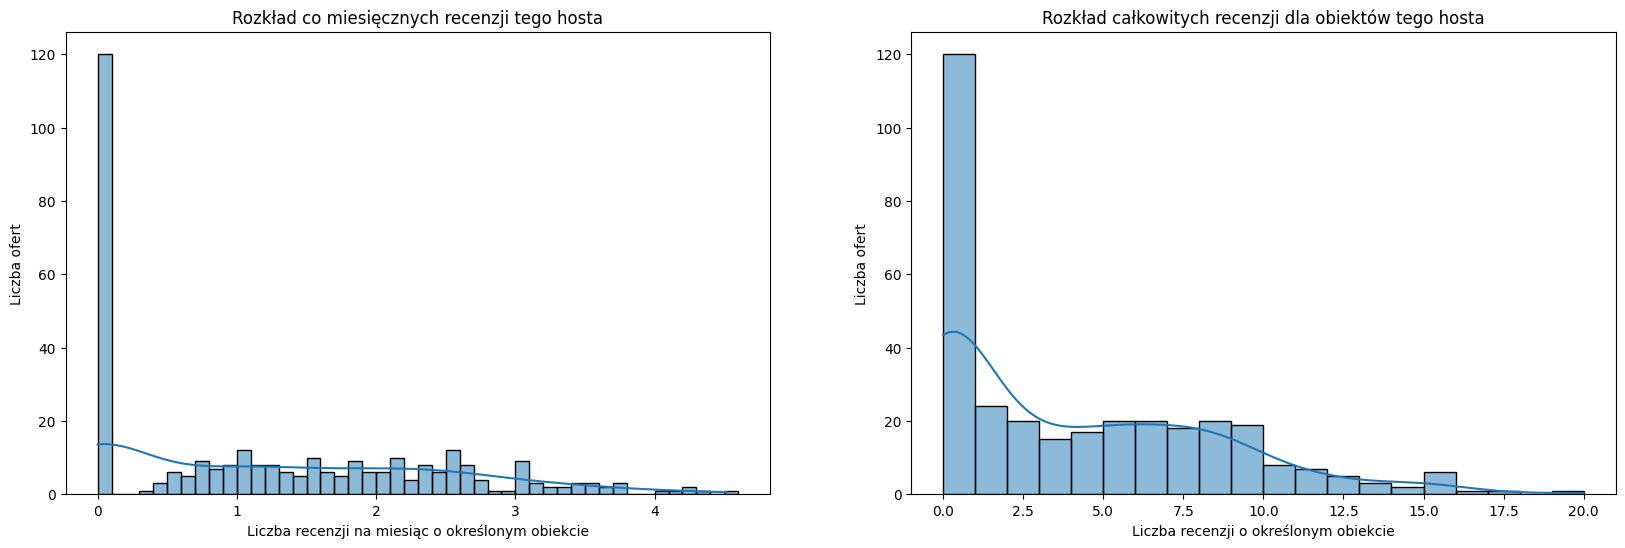

In [49]:
fig, ax = plt.subplots(1 ,2, figsize=(20, 6))
ax[0].set_title("Rozkład co miesięcznych recenzji tego hosta", fontsize=12)
ax[0].set_xlabel("Liczba recenzji na miesiąc o określonym obiekcie")
ax[0].set_ylabel("Liczba ofert")
ax[1].set_title("Rozkład całkowitych recenzji dla obiektów tego hosta", fontsize=12)
ax[1].set_xlabel("Liczba recenzji o określonym obiekcie")
ax[1].set_ylabel("Liczba ofert")
sns.histplot(data=top_host_objects, x="reviews_per_month", kde=True, binwidth=0.1, ax=ax[0]);
sns.histplot(data=top_host_objects, x="number_of_reviews", kde=True, binwidth=1, ax=ax[1]);

Powyższy wykres mówi nam, że około 1/3 wszystkich obiektów posiada blisko 0 recenzji. Ten sam wniosek tyczy się zarówno recenzji na miesiąc jak i ogólnej metryki.

Przejdźmy więc do przeglądu badanych mieszkań i domów na mapie.

In [50]:
top_host_rev_month = folium.Map([40.7128,-74.0060],zoom_start=11)
folium.plugins.HeatMap(top_host_objects[['latitude','longitude']].dropna(),
                       radius=8).add_to(top_host_rev_month)
display(top_host_rev_month)

Przedstawienie tych mieszkań na mapie odkrywa bardzo ciekawą zależność. Większość tych mieszkań znajduje się na Wall Street, a dokładniej dookoła Nowojorskiej giełdy papierów wartościowych. Oznacza to, że z dużą dozą pewności możemy założyć, że są one wynajmowane przez ludzi związanymi z giełdą, co oznacza że możliwe jest wynajęcie ich po tak wysokiej cenie w porównaniu do średniej.

## Oferty według typu pokoju/apartamentu

Podczas korzystania z serwisu AirBnB możliwe będzie wynajęcie nie tylko całego mieszkania, ale również i współdzielonego pokoju, pojedynczego prywatnego pokoju, a nawet i całego wolno stojącego domu! W przypadku Nowego Jorku ta ostatnia wersja jest ekstremalną rzadkością, dlatego też możemy założyć, że kategoria "Entire home/apt" odnosi się w większości do apartamentów oraz różnego rodzaju mieszkań aniżeli całych domów w dosłownym znaczeniu. Poniższy wykres przedstawia rozkład wszystkich badanych tu ogłoszeń podzielonych i zestawionych ze sobą właśnie na podstawie typu wynajmowanego obiektu.

()

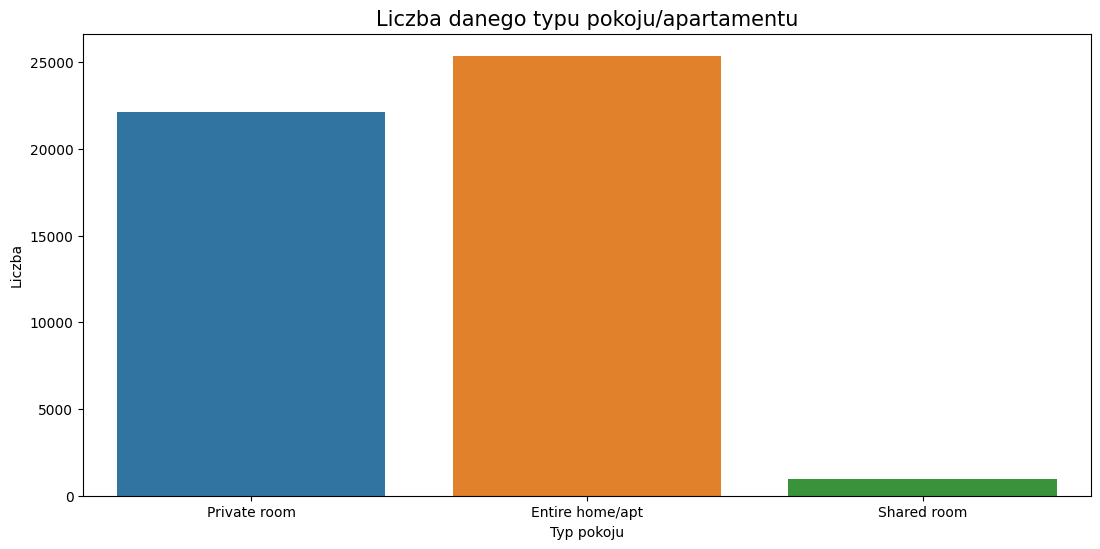

In [51]:
plt.figure(figsize=(13,6))
sns.countplot(data=df, x='room_type')
plt.title('Liczba danego typu pokoju/apartamentu', fontsize=15)
plt.xlabel('Typ pokoju')
plt.ylabel("Liczba")
()

Powyższy podział na rodzaje wynajmowanego mieszkania pozwala na obserwację niewielkiej różnicy w liczbie ogłoszeń pomiędzy jednym pokojem, a całym apartamentem na korzyść apartamentów oraz niewielkim wkładem w rynek pokojów dzielonych z lokatorem "shared room". Może to być spowodowane wieloma czynnikami. Najbardziej prawdopodobnym z nich jest fakt, że współdzielony pokój zapewnia bardzo niewielką przestrzeń prywatną, co dla wielu może przekreślić nawet najbardziej atrakcyjną ofertę pod względem położenia czy też nawet ceny.

Wynajmowanie prywatnego pokoju natomiast cieszy się bardzo dużą popularnością. Pozwala ona często na pasywny dochód dla właściciela mieszkania, ale niesie za sobą kolejne koszta, zarówno w postaci materialnej jak i wcześniej wspomnianej prywatności.

Ogłoszenia całych mieszkań jest zarezerwowane dla osób zamożnych, które najprawdopodobniej posiadają kolejną nieruchomość, która mogą wykorzystać jako swój dom, a poprzez wynajęcie zapewniają sobie dochód oraz potencjalnie nowe znajomości.

()

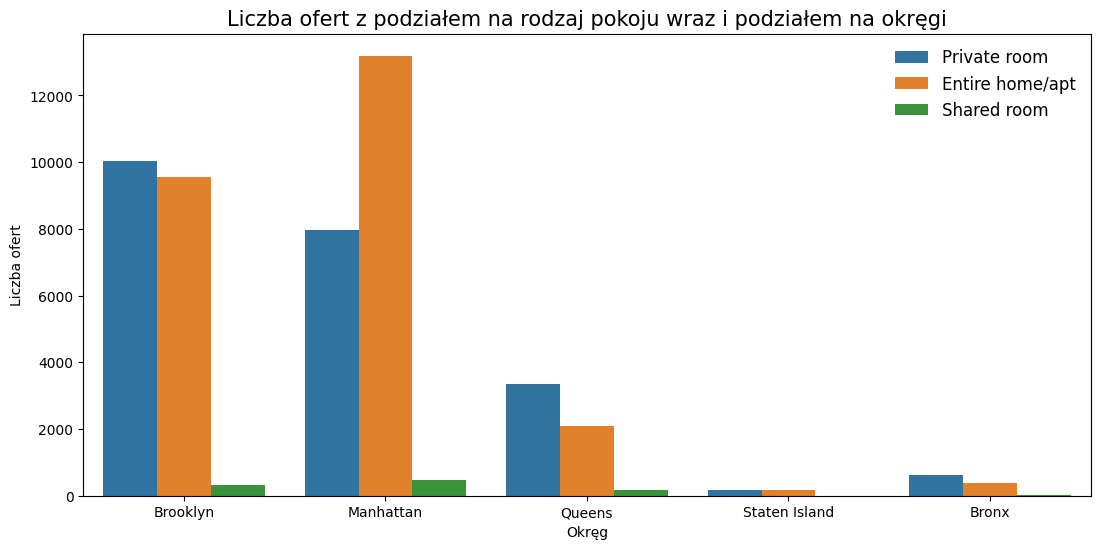

In [52]:
plt.figure(figsize=(13,6))
sns.countplot(data=df, x='neighbourhood_group', hue='room_type')
plt.title('Liczba ofert z podziałem na rodzaj pokoju wraz i podziałem na okręgi', fontsize=15)
plt.xlabel('Okręg')
plt.ylabel("Liczba ofert")
plt.legend(frameon=False, fontsize=12) 
()

Jak widać na powyższym wykresie, liczba wynajmowanych mieszkań jest największa na Manhattan'ie. Pokrywa się z wcześniejszym wnioskiem dotyczącym zamożności właściciela oraz wynajmowaniem całego mieszkania wyłącznie w celach zarobkowych. 

Proporcja współdzielonego pokoju pozostała na bardzo podobnym poziomie dla wszystkich badanych okręgów.

Ciekawym wynikiem jest natomiast większa liczba wynajmowanych prywatnych pokojów w porównaniu do całych mieszkań. Jest to prawdopodobnie uwarunkowane niższymi cenami i jak będzie to przedstawione na kolejnych wykresach, ceny pomiędzy okręgami mogą się różnić nawet kilkukrotnie dla mieszkania czy też pokoju z podobnego poziomu. Kolejnym powodem może być ogromna przewaga wynajmowania całych mieszkań ponad pokojami na Manhattan'ie, natomiast w rozrachunku dla całego Nowego Jorku, nie widzimy aż takiej różnicy.

Ciekawa wizualizacja sporej przewagi liczby ofert apartamentów nad pokojami w Manhatanie i niewielkiej przewagi pokojów w pozostałych okręgach. 

### Rozkłady cen ogłoszeń dla każdego z okręgów

Uważamy, że warto spojrzeć na uszeregowane najdroższe obiekty dostępne do wynajęcia według naszej bazy danych. Pozwoli nam to określić gdzie znajdują się najbardziej kosztowne miejsca. Posortowane będą według ceny na noc.

In [53]:
expensive_apts = df[["host_id", "name", "price", "price_per_night", "neighbourhood_group", "latitude", "longitude", "number_of_reviews", "minimum_nights"]].copy()
# Jeżeli chcemy odwrócić znowu na wartości liczbowe to używamy map(hrabstwo_mapping) zamiast map(hrabstwo_mapping_reversed)
expensive_apts.sort_values("price_per_night", inplace=True, ascending=False)
expensive_apts.head(20)

,host_id,name,price,price_per_night,neighbourhood_group,latitude,longitude,number_of_reviews,minimum_nights
4377,1177497,Film Location,8000,8000,Brooklyn,40.69137,-73.96723,1,1
29662,156158778,East 72nd Townhouse by (Hidden by Airbnb),7703,7703,Manhattan,40.76824,-73.95989,0,1
42523,7407743,70' Luxury MotorYacht on the Hudson,7500,7500,Manhattan,40.71162,-74.01693,0,1
45666,262534951,Gem of east Flatbush,7500,7500,Brooklyn,40.65724,-73.92450,8,1
44034,3750764,3000 sq ft daylight photo studio,6800,6800,Manhattan,40.75060,-74.00388,0,1
3774,11598359,SUPER BOWL Brooklyn Duplex Apt!!,6500,6500,Brooklyn,40.68766,-73.96439,0,1
29664,156158778,Park Avenue Mansion by (Hidden by Airbnb),6419,6419,Manhattan,40.78517,-73.95270,0,1
15560,66240032,Luxury townhouse Greenwich Village,6000,6000,Manhattan,40.73046,-73.99562,0,1
3720,1483320,"SuperBowl Penthouse Loft 3,000 sqft",5250,5250,Manhattan,40.71895,-73.99793,0,1
38000,172611460,4-Floor Unique Event Space 50P Cap. - #10299B,5000,5000,Manhattan,40.82511,-73.94961,2,1


Powyżej zostały przedstawione 20 najdroższych obiektów. Tak jak moglibyśmy zakładać na podstawie wcześniejszej analizy, największa liczba drogich obiektów znajduje się w obrębie Manhattanu, bo aż 15 z 20 tutaj wyświetlonych. Pierwsza pozycja to lokalizacja filmowa. Oznacza to, że nie jest ona przeznaczona do spędzenia tam nocy, ale tylko do wykorzystania obecnej tam scenerii do wykonania własnego filmu czy zdjęcia. Na powyższej liście możemy znaleźć więcej podobnych miejsc, ale to ta wymaga największego wkładu finansowego. Najdroższym z nich jest to przedstawione poniżej:

![Top_Priced_Filming_Location](img/top_price_filming_spot.png)

Nie udało nam się znaleźć wyjaśnienia dlaczego wynajęcie tego miejsca jest aż tak drogie. Aktualnie to miejsce jest zarejestrowane jako siedzibą adwokata "Carl J. Muraco Attorney at Law". 

Kolejne miejsca nie wybiegają poza normę, jakiej możnaby się spodziewać za tą cenę: wynajęcie kilkunastometrowego jachtu, wille, domy o metrażu przekraczającym kilkaset metrów kwadratowych w centrum Manhattanu czy też całą galerię na własny użytek. Możliwe jest również wynajęcie mieszkania w pobliżu stadionu podczas zawodów SUPER BOWL. Podczas badania tych danych możemy zauważyć, że jednak nie wszystkie obiekty zasługują na tą cenę. W tym przypadku, jesteśmy skłonni stwierdzić, że noc w mieszkaniu z jedną sypialnią w Soho, Manhattan nie jest warta zawrotnej ceny $5000, ale możliwym jest również jednorazowe wydarzenie w pobliżu, które wywindowało cenę do tego stopnia.

Nałożmy powyższe dane na mapę. Dla zwiększenia czytelności, dodamy również znaczniki odpowiadające każdemu z tych obiektów.

In [54]:
def add_Markers(dest_map, dataframe, amount = 30):
   # dest_map: mapa, na którą chcemy nałożyć markery
   # dataframe: dataframe, z którego pobierane będą dane w celu określenia pozycji markerów
   # amount: liczba markerów do utworzenia na mapie. Liczba jest brana z head'a danego dataframe'a, dlatego też może konieczne być sortowanie
    for i in range(0,amount):
       folium.Marker(
          location=[dataframe.head(amount).iloc[i]['latitude'], dataframe.head(amount).iloc[i]['longitude']],
          popup=dataframe.head(amount).iloc[i]['name'],
       ).add_to(dest_map)

In [55]:
expensive_map = folium.Map([40.7128,-74.0060],zoom_start=11)
folium.plugins.HeatMap(expensive_apts[['latitude','longitude']].head(20).dropna(),
                       radius=8, gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(expensive_map)

add_Markers(expensive_map, expensive_apts, 20)

expensive_map

Dzięki powyższej mapie, łatwo można zauważyć, że obiekty normalne (czyli przeznaczone do spędzenia tam nocy) w lwiej części znajdują się w okręgu Manhattan oraz zaskakująco - w Queens. Reszta, czyli placówki do filmowania znajdują się zarówno na Staten Island, Brooklyn.

Jako, że wykonaliśmy powyższą analizę dla najdroższych miejsc, wykonamy analogiczne zestawienie dla najtańszych miejsc.

In [56]:
expensive_apts.sort_values("price", inplace=True)
expensive_apts.head(20)

,host_id,name,price,price_per_night,neighbourhood_group,latitude,longitude,number_of_reviews,minimum_nights
9146,10945786,15 min walk to Prospect Park!,30,5,Brooklyn,40.65887,-73.94882,1,6
29431,76664098,A cozy place to rest,30,30,Queens,40.75981,-73.82021,0,1
12933,38064272,Cozy Room in Cozy Apartment,30,30,Brooklyn,40.68535,-73.95036,3,1
40036,232251881,6 Minutes From JFK Airport Cozy Bedroom,30,30,Queens,40.66800,-73.78477,98,1
4757,4044499,Happy big family,30,30,Brooklyn,40.65287,-73.96353,0,1
26381,151291713,Cheap bedroom with private half bath attached!,30,30,Manhattan,40.85014,-73.93743,67,1
14395,8145820,Room in East Harlem,30,30,Manhattan,40.79606,-73.94881,1,1
3903,8904815,Relaxed Comfortable Beds in A Cozy Apartment.,30,6,Brooklyn,40.64307,-73.95455,34,5
17701,23526253,Private Room in Fun Neighborhood,30,2,Queens,40.71164,-73.91879,0,15
776,1452026,Large Room in a Huge NY apartment.,30,6,Queens,40.77117,-73.91905,3,5


Powyższe obiekty rozsiane są głównie na Brooklynie oraz Queens, co zobaczyć będzie można znacznie lepiej na mapie z tymi wyznacznikami. Widzimy jednak, że parametr cena na noc nie jest idealnym wyznacznikiem ponieważ nasza baza danych jest obarczona niejednoznacznością oznaczenia parametru cena. Mianowicie, przy niskich wartościach minimalnych noclegów, cena wydaje się oznaczać cenę na noc, natomiast przy ich większej liczbie, jest ona sumaryczną kwotą za cały pobyt. Dlatego też tutaj posortowane zostały wartości na podstawie samej ceny.

W tabeli można wywnioskować, że większość z tych obiektów nie korzysta z tytułu w celu zamieszenia krótkiego opisu wynajmowanego pokoju. Widzimy natomiast, że jest tam umieszczone umiejscowienie geograficzne, a bardziej dokładnie odległość od pewnych orientacyjnych i często uczęszczanych punktów typu Central Park czy Downtown Manhattan. Sprawdzimy jak to wygląda na mapie.

In [57]:
cheap_map = folium.Map([40.6810,-74.0060],zoom_start=11)
folium.plugins.HeatMap(expensive_apts[['latitude','longitude']].head(20).dropna(),
                       radius=8, gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(cheap_map)

add_Markers(cheap_map, expensive_apts, 20)
display(cheap_map)

Widzimy, że umieszczone na mapie znaczniki znacznie częściej wskazują teren Brooklynu od innych okręgów. Jest to prawodopodobnie spowodowane znacznie przeważającą liczbą zapisanych obiektów dla Manhattanu oraz Brooklynu (łącznie ~40000 rekordów) w porównaniu do całości bazy (~48000 rekordów), co może oznaczać że mimo podobnej średniej ceny mieszkań w porónwaniu do reszty Nowego Jorku (poza Manhattanem) pojawia się tam po prostu z większą częstością. Innym powodem może być również mniejsza średnia cena w porównaniu do mieszkań położonych na Manhattanie.

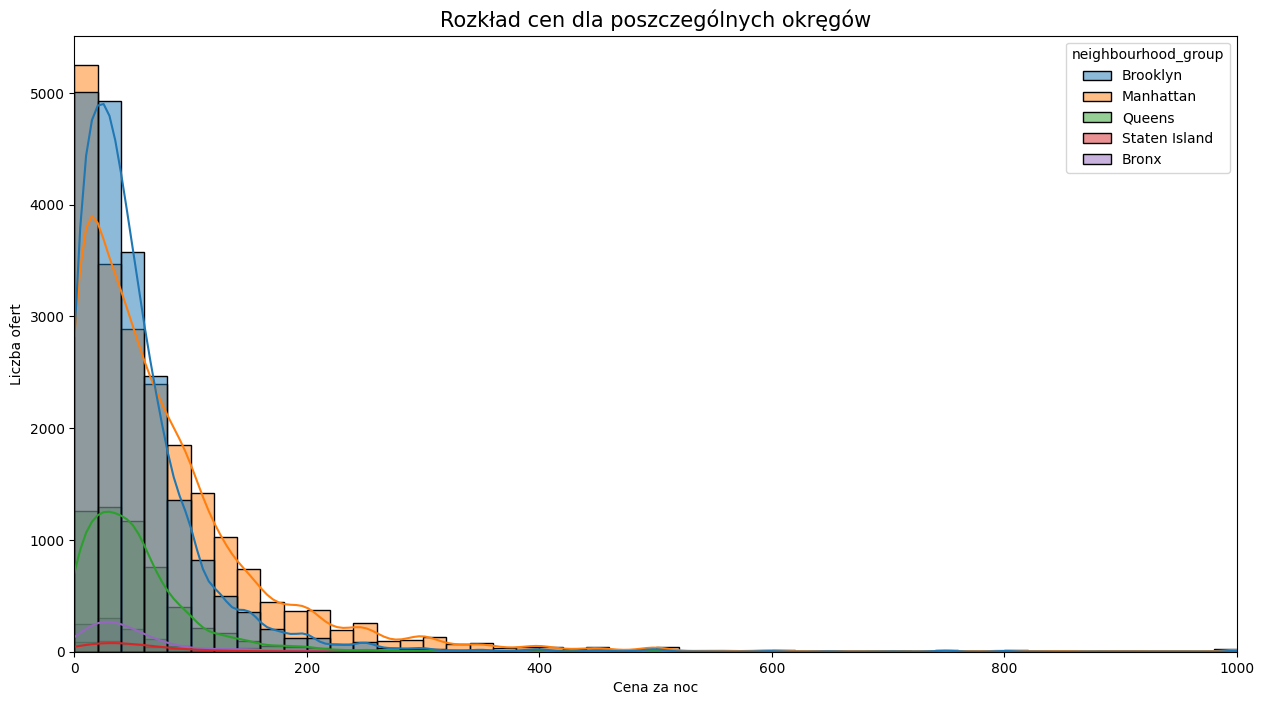

In [58]:
sub=df[df.price_per_night <= 1000]
plt.figure(figsize=(15,8))
plt.margins(x=0)
plt.title('Rozkład cen dla poszczególnych okręgów', fontsize=15)
plt.xlabel('Cena za noc')
plt.ylabel("Liczba ofert")
sns.histplot(data=sub, x="price_per_night", hue="neighbourhood_group", kde=True, binwidth=20);

W wyniku analizy wykresu rozkładu cen dla poszczególnych dzielnic, możemy wywnioskować iż ceny powyżej 400 dolarów za noc są to oferty, które są rzadkością min. Wynajem miejsca pod zdjęcia filmowe. W celu implementacji modeli predykcyjnych, wartości powyżej 500 nie będą brane pod uwagę. Ponadto możemy zauważyć, że najpopularniejszymi dzielnicami pod względem ofert w serwisie Airbnb w Nowym Jorku, są Brooklyn oraz Manhattan, gdzie w drugim okręgu w wyniku atrakcyjności okręgu ofert, gdzie cena jest stosunkowo wysoka jest więcej.

Ze względu na ogromną różnicę w liczbie ogłoszeń pomiędzy Manhattanem czy też Brooklynem, a pozostałymi dzielnicami, ciekawym punktem zaczepienia będzie zestawienie ich cen ze względu na położenie. W tym celu, skorzystamy z wykresu skrzypcowego z podziałem na główne badane okręgi. Pozwoli to określić w jaki sposób rozkładają się ceny mieszkań w każdym z nich. Ze względu z wcześniejszą analizą, ograniczymy badane wartości do $500.

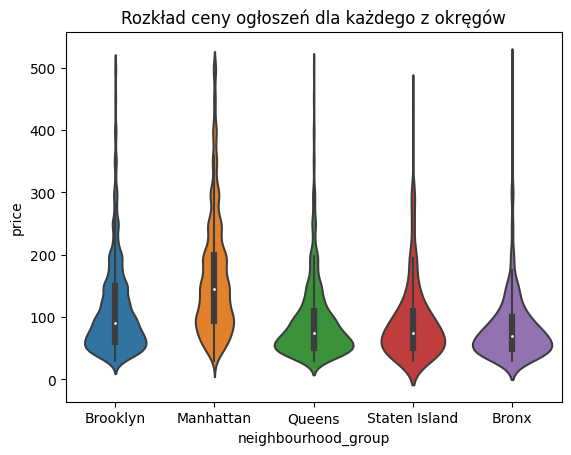

In [59]:
sub=df[df.price <= 500]
viol=sns.violinplot(data=sub, x='neighbourhood_group', y='price').set(title="Rozkład ceny ogłoszeń dla każdego z okręgów")

Powyższy wykres pokazuje, jak bardzo różni się docelowy rynek pomiędzy Manhattan'em, a resztą Nowego Jorku. 

Dla każdego z pozostałych okręgów możemy zaobserwować widoczne "wybrzuszenie się" naszych skrzypiec w dolnych granicach, gdzieś około wartości $60 - $70 i potem mniej lub bardziej gwałtowny spadek liczby ogłoszeń, aż do osiągnięcia bardzo niewielkiej szerokości naszych wykresów. Średnia wartość plasuje się w okolicach $80 dla Brooklynu, Queens, Staten Island oraz Bronxu.

Sytuacja wygląda zgoła inaczej w przypadku Manhattanu. Sama średnia kwota, którą musimy zapłacić wynosi w przybliżeniu $150. Nie jesteśmy w stanie również zaobserwować tak dużej liczbie ogłoszeń w podobnej cenie, jako że liczba ogłoszeń maleje w znacznie wolniejszym tempie w porównaniu do pozostałych okręgów. Widzimy również zwężenie do minimalnej szerokości następuje gdzieś w okolicy $400, gdzie dla reszty dzieję się to przy około $300. Pokazuje to, że w tym miejscu możemy znaleźć znacznie bardziej różnorodne mieszkania o różnych standardach, co jest mnożone poprzez umiejscowienie geograficzne w okolicy ludzi sukcesu oraz bogaczy.

Ze względu na ciekawe wyniki powyższych odczytów, sprawdzmy jak statystycznie wyglądają ceny w poszczególnych dzielnicach.
Poniżej umieściliśmy dane z cen dla każdej z dzielnic w jednej liście.

In [60]:
#Brooklyn
sub_1=df.loc[df['neighbourhood_group'] == 'Brooklyn']
price_sub1=sub_1[['price']]
#Manhattan
sub_2=df.loc[df['neighbourhood_group'] == 'Manhattan']
price_sub2=sub_2[['price']]
#Queens
sub_3=df.loc[df['neighbourhood_group'] == 'Queens']
price_sub3=sub_3[['price']]
#Staten Island
sub_4=df.loc[df['neighbourhood_group'] == 'Staten Island']
price_sub4=sub_4[['price']]
#Bronx
sub_5=df.loc[df['neighbourhood_group'] == 'Bronx']
price_sub5=sub_5[['price']]

price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

Teraz utworzymy tabelę, która pokaże nam, jak wyglądają poszczególne kwartyle dla każdego z okręgów. Pozwoli to nam określić, jak na przestrzeni całego zbioru plasują się określone mieszkania i jakich kategorii cenowych możemy oczekiwać.

In [61]:
data_table=[]
name_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

#Zbieranie statystyk dla cen określonych przez centyle

for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    data_table.append(i)
    
#
#Zmiana nazw w celu łatwiejszego odczytania nazw okręgów 
   
for i in range(5):
    data_table[i].rename(columns={'price':name_list[i]}, inplace=True)  
data_table=[df.set_index('Stats') for df in data_table]
data_table=data_table[0].join(data_table[1:])
data_table

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,30.0,30.0,30.0,30.0,30.0
25%,60.0,95.0,51.0,50.0,50.0
50%,93.0,150.0,75.0,75.0,69.0
75%,150.0,220.0,112.0,110.0,100.0
max,10000.0,10000.0,10000.0,5000.0,2500.0


In [62]:
#Brooklyn
sub_1_price_per_night=df.loc[df['neighbourhood_group'] == 'Brooklyn']
price_per_night_sub1=sub_1[['price_per_night']]
#Manhattan
sub_2_price_per_night=df.loc[df['neighbourhood_group'] == 'Manhattan']
price_per_night_sub2=sub_2[['price_per_night']]
#Queens
sub_3_price_per_night=df.loc[df['neighbourhood_group'] == 'Queens']
price_per_night_sub3=sub_3[['price_per_night']]
#Staten Island
sub_4_price_per_night=df.loc[df['neighbourhood_group'] == 'Staten Island']
price_per_night_sub4=sub_4[['price_per_night']]
#Bronx
sub_5_price_per_night=df.loc[df['neighbourhood_group'] == 'Bronx']
price_per_night_sub5=sub_5[['price_per_night']]

price_per_night_list_by_n=[price_per_night_sub1, price_per_night_sub2, price_per_night_sub3, price_per_night_sub4, price_per_night_sub5]

In [63]:
data_table=[]
name_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

#Zbieranie statystyk dla cen określonych przez centyle

for x in price_per_night_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    data_table.append(i)
    
#
#Zmiana nazw w celu łatwiejszego odczytania nazw okręgów 
   
for i in range(5):
    data_table[i].rename(columns={'price_per_night':name_list[i]}, inplace=True)  
data_table=[df.set_index('Stats') for df in data_table]
data_table=data_table[0].join(data_table[1:])
data_table


,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.0,0.0,0.0,0.0,0.0
25%,19.0,20.0,21.0,20.0,20.0
50%,40.0,50.0,43.0,40.0,37.0
75%,69.0,100.0,70.0,65.0,60.0
max,8000.0,7703.0,2000.0,5000.0,1250.0


### Brooklyn

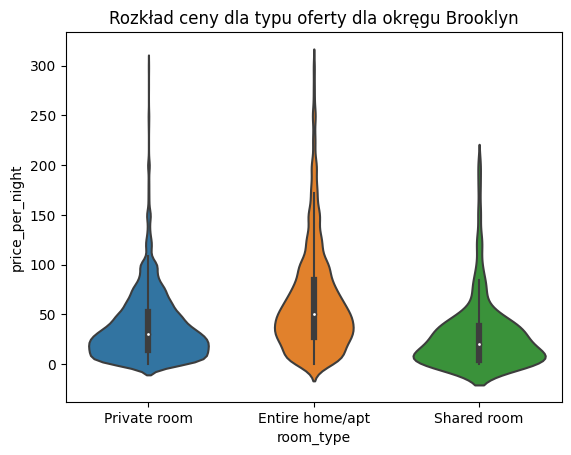

In [64]:
sub=n_df_Brooklyn[n_df_Brooklyn.price_per_night <= 300]
viol=sns.violinplot(data=sub, x='room_type', y='price_per_night').set(title="Rozkład ceny dla typu oferty dla okręgu Brooklyn")

In [65]:
#room Type
sub_1=n_df_Brooklyn.loc[n_df_Brooklyn['room_type'] == 'Private room']
price_per_night_sub1=sub_1[['price_per_night']]

sub_1=n_df_Brooklyn.loc[n_df_Brooklyn['room_type'] == 'Entire home/apt']
price_per_night_sub1=sub_1[['price_per_night']]

sub_1=n_df_Brooklyn.loc[n_df_Brooklyn['room_type'] == 'Shared room']
price_per_night_sub1=sub_1[['price_per_night']]


price_per_night_list_by_n=[price_per_night_sub1, price_per_night_sub2, price_per_night_sub3]

In [66]:
data_table=[]
name_list=['Private room', 'Entire home/apt', 'Shared room']

for x in price_per_night_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Brooklyn'}, inplace=True)
    data_table.append(i)
    

#Zmiana nazw w celu łatwiejszego odczytania nazw okręgów 
   
for i in range(3):
    data_table[i].rename(columns={'price_per_night':name_list[i]}, inplace=True)  
data_table=[df.set_index('Brooklyn') for df in data_table]
data_table=data_table[0].join(data_table[1:])
data_table

,Private room,Entire home/apt,Shared room
Brooklyn,,,
min,0.0,0.0,0.0
25%,4.0,20.0,21.0
50%,20.0,50.0,43.0
75%,38.0,100.0,70.0
max,725.0,7703.0,2000.0


<AxesSubplot: title={'center': 'Rozkład cen dla typów pokoi Brooklyn'}, xlabel='Cena za noc', ylabel='Liczba ofert'>

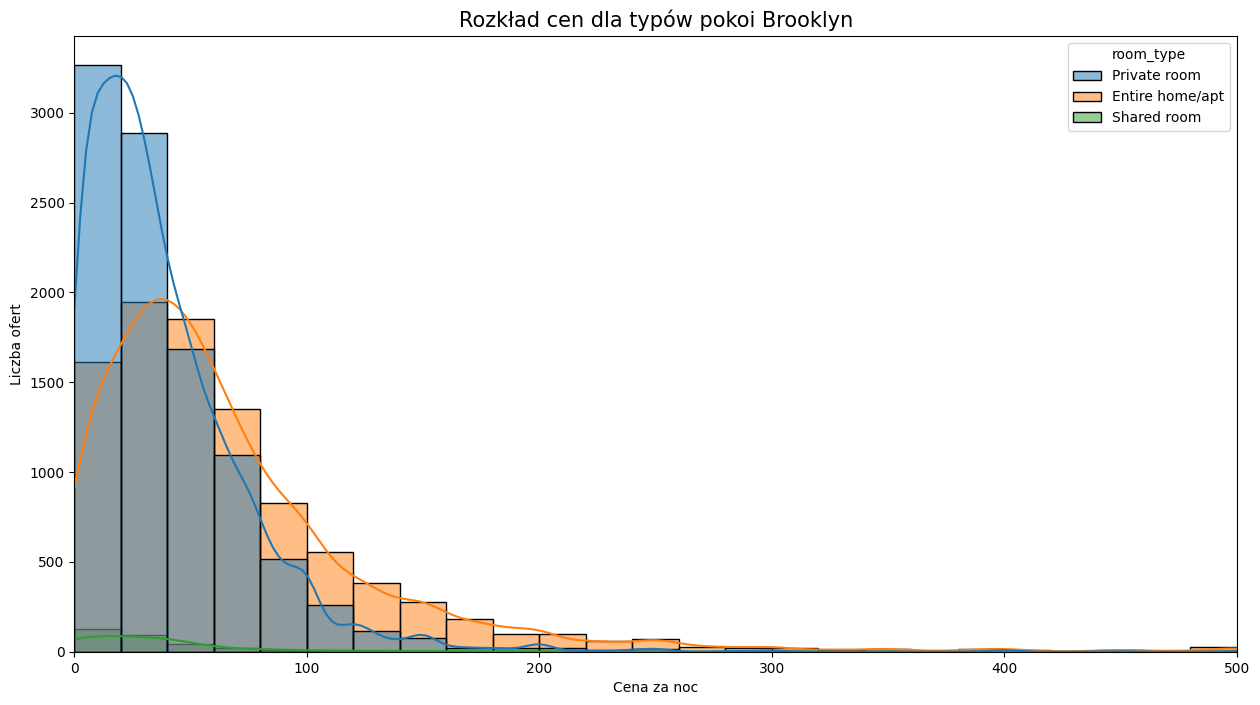

In [67]:
sub=df[df.neighbourhood_group == "Brooklyn"]
sub=sub[sub.price_per_night <= 500]
plt.figure(figsize=(15,8))
plt.margins(x=0)
plt.title('Rozkład cen dla typów pokoi Brooklyn', fontsize=15)
plt.xlabel('Cena za noc')
plt.ylabel("Liczba ofert")
sns.histplot(data=sub, x="price_per_night", hue="room_type", kde=True, binwidth=20)

W okręgu Brooklyn, w typach ofert dominują takie gdzie wynajęty jest cały apartament lub też pojedynczy pokój. Zauważyć można, że cena, powyżej której liczba ofert wynajmu całego apartamentu jest większa to około 43 dolary za noc.

### Manhattan

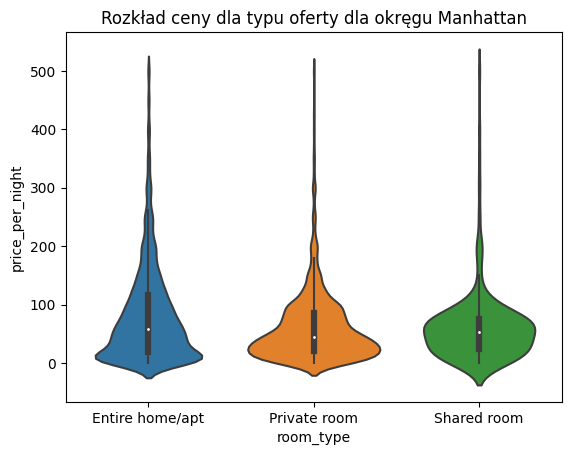

In [68]:
sub=n_df_Manhattan[n_df_Manhattan.price_per_night <= 500]
viol=sns.violinplot(data=sub, x='room_type', y='price_per_night').set(title="Rozkład ceny dla typu oferty dla okręgu Manhattan")

In [69]:
#room Type
sub_1=n_df_Manhattan.loc[n_df_Manhattan['room_type'] == 'Private room']
price_per_night_sub1=sub_1[['price_per_night']]

sub_1=n_df_Manhattan.loc[n_df_Manhattan['room_type'] == 'Entire home/apt']
price_per_night_sub1=sub_1[['price_per_night']]

sub_1=n_df_Manhattan.loc[n_df_Manhattan['room_type'] == 'Shared room']
price_per_night_sub1=sub_1[['price_per_night']]


price_per_night_list_by_n=[price_per_night_sub1, price_per_night_sub2, price_per_night_sub3]

In [70]:
data_table=[]
name_list=['Private room', 'Entire home/apt', 'Shared room']

for x in price_per_night_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Manhattan'}, inplace=True)
    data_table.append(i)
    

#Zmiana nazw w celu łatwiejszego odczytania nazw okręgów 
   
for i in range(3):
    data_table[i].rename(columns={'price_per_night':name_list[i]}, inplace=True)  
data_table=[df.set_index('Manhattan') for df in data_table]
data_table=data_table[0].join(data_table[1:])
data_table

,Private room,Entire home/apt,Shared room
Manhattan,,,
min,0.0,0.0,0.0
25%,24.0,20.0,21.0
50%,54.0,50.0,43.0
75%,75.0,100.0,70.0
max,1000.0,7703.0,2000.0


<AxesSubplot: title={'center': 'Rozkład cen dla typów pokoi Manhattan'}, xlabel='Cena za noc', ylabel='Liczba ofert'>

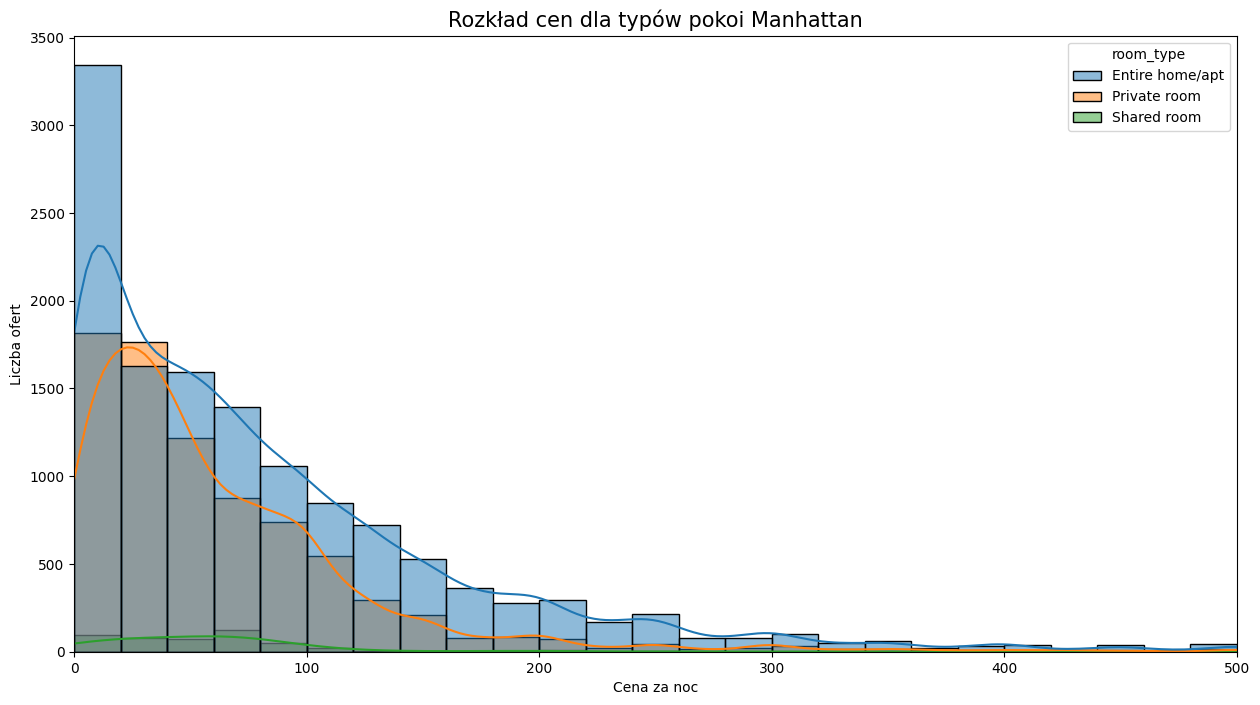

In [71]:
sub=df[df.neighbourhood_group == "Manhattan"]
sub=sub[sub.price_per_night <= 500]
plt.figure(figsize=(15,8))
plt.margins(x=0)
plt.title('Rozkład cen dla typów pokoi Manhattan', fontsize=15)
plt.xlabel('Cena za noc')
plt.ylabel("Liczba ofert")
sns.histplot(data=sub, x="price_per_night", hue="room_type", kde=True, binwidth=20)

W okręgu Manhattan  najwięcej ofert całym przedziale cenowym to całe apartamenty, może to wynikać z tego iż właściciele chcą lokować swoje oszczędności w nieruchomości w miejscu, które jest atrakcyjne dla zwiedzających przez cały rok, czego wynikiem są wysokie przychody bierne.

### Queens

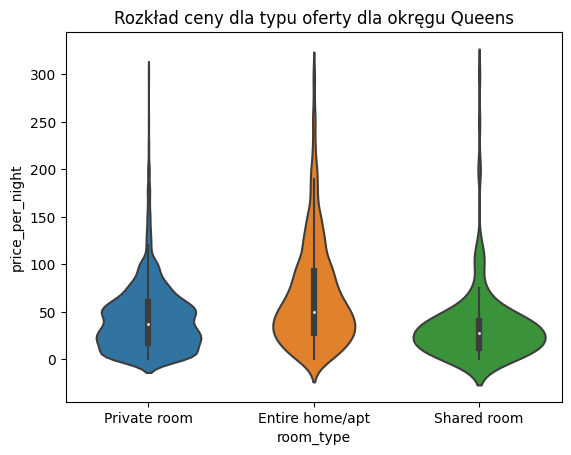

In [72]:
sub=n_df_Queens[n_df_Queens.price_per_night <= 300]
viol=sns.violinplot(data=sub, x='room_type', y='price_per_night').set(title="Rozkład ceny dla typu oferty dla okręgu Queens")

In [73]:
#room Type
sub_1=n_df_Queens.loc[n_df_Queens['room_type'] == 'Private room']
price_per_night_sub1=sub_1[['price_per_night']]

sub_1=n_df_Queens.loc[n_df_Queens['room_type'] == 'Entire home/apt']
price_per_night_sub1=sub_1[['price_per_night']]

sub_1=n_df_Queens.loc[n_df_Queens['room_type'] == 'Shared room']
price_per_night_sub1=sub_1[['price_per_night']]


price_per_night_list_by_n=[price_per_night_sub1, price_per_night_sub2, price_per_night_sub3]

In [74]:
data_table=[]
name_list=['Private room', 'Entire home/apt', 'Shared room']

for x in price_per_night_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Queens'}, inplace=True)
    data_table.append(i)
    

#Zmiana nazw w celu łatwiejszego odczytania nazw okręgów 
   
for i in range(3):
    data_table[i].rename(columns={'price_per_night':name_list[i]}, inplace=True)  
data_table=[df.set_index('Queens') for df in data_table]
data_table=data_table[0].join(data_table[1:])
data_table

,Private room,Entire home/apt,Shared room
Queens,,,
min,0.0,0.0,0.0
25%,12.0,20.0,21.0
50%,28.5,50.0,43.0
75%,41.0,100.0,70.0
max,1250.0,7703.0,2000.0


<AxesSubplot: title={'center': 'Rozkład cen dla typów pokoi Queens'}, xlabel='Cena za noc', ylabel='Liczba ofert'>

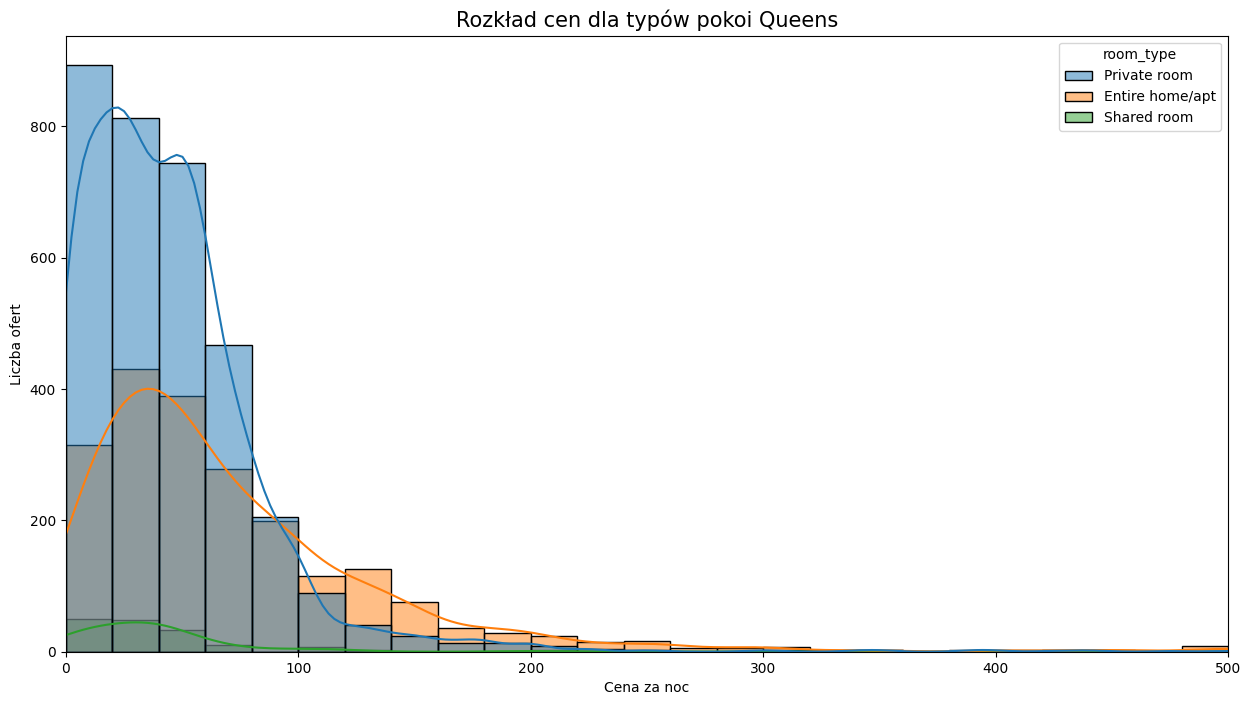

In [75]:
sub=df[df.neighbourhood_group == "Queens"]
sub=sub[sub.price_per_night <= 500]
plt.figure(figsize=(15,8))
plt.margins(x=0)
plt.title('Rozkład cen dla typów pokoi Queens', fontsize=15)
plt.xlabel('Cena za noc')
plt.ylabel("Liczba ofert")
sns.histplot(data=sub, x="price_per_night", hue="room_type", kde=True, binwidth=20)

Dla okręgu Queens dla ceny za noc poniższej 100$ liczba ofert prywatnych pokojów znacząco przewyższa apartamenty oraz pokoje jednoosobowe jednak po cenie 95$ wzwyż to apartamenty mają więcej ofert. Może wynikać to z tego, że apartamenty z reguły są droższe, bo jakość waunków mieszkaniowych rośnie wraz z ceną.

### Staten Island

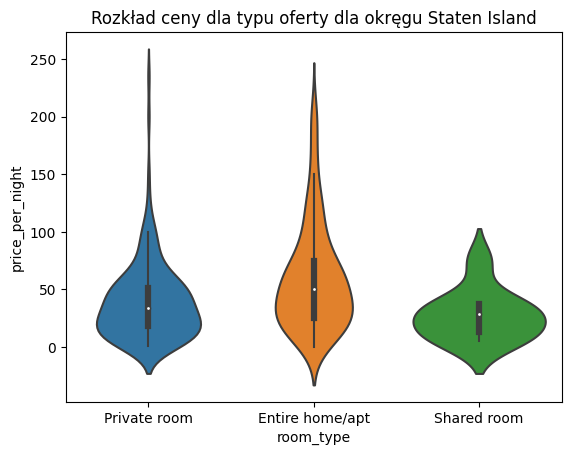

In [76]:
sub=n_df_Staten_Island[n_df_Staten_Island.price_per_night <= 250]
viol=sns.violinplot(data=sub, x='room_type', y='price_per_night').set(title="Rozkład ceny dla typu oferty dla okręgu Staten Island")

In [77]:
#room Type
sub_1=n_df_Staten_Island.loc[n_df_Staten_Island['room_type'] == 'Private room']
price_per_night_sub1=sub_1[['price_per_night']]

sub_1=n_df_Staten_Island.loc[n_df_Staten_Island['room_type'] == 'Entire home/apt']
price_per_night_sub1=sub_1[['price_per_night']]

sub_1=n_df_Staten_Island.loc[n_df_Staten_Island['room_type'] == 'Shared room']
price_per_night_sub1=sub_1[['price_per_night']]


price_per_night_list_by_n=[price_per_night_sub1, price_per_night_sub2, price_per_night_sub3]

In [78]:
data_table=[]
name_list=['Private room', 'Entire home/apt', 'Shared room']

for x in price_per_night_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Staten Island'}, inplace=True)
    data_table.append(i)
    

#Zmiana nazw w celu łatwiejszego odczytania nazw okręgów 
   
for i in range(3):
    data_table[i].rename(columns={'price_per_night':name_list[i]}, inplace=True)  
data_table=[df.set_index('Staten Island') for df in data_table]
data_table=data_table[0].join(data_table[1:])
data_table

,Private room,Entire home/apt,Shared room
Staten Island,,,
min,5.0,0.0,0.0
25%,13.0,20.0,21.0
50%,29.0,50.0,43.0
75%,37.0,100.0,70.0
max,75.0,7703.0,2000.0


<AxesSubplot: title={'center': 'Rozkład cen dla typów pokoi Staten Island'}, xlabel='Cena za noc', ylabel='Liczba ofert'>

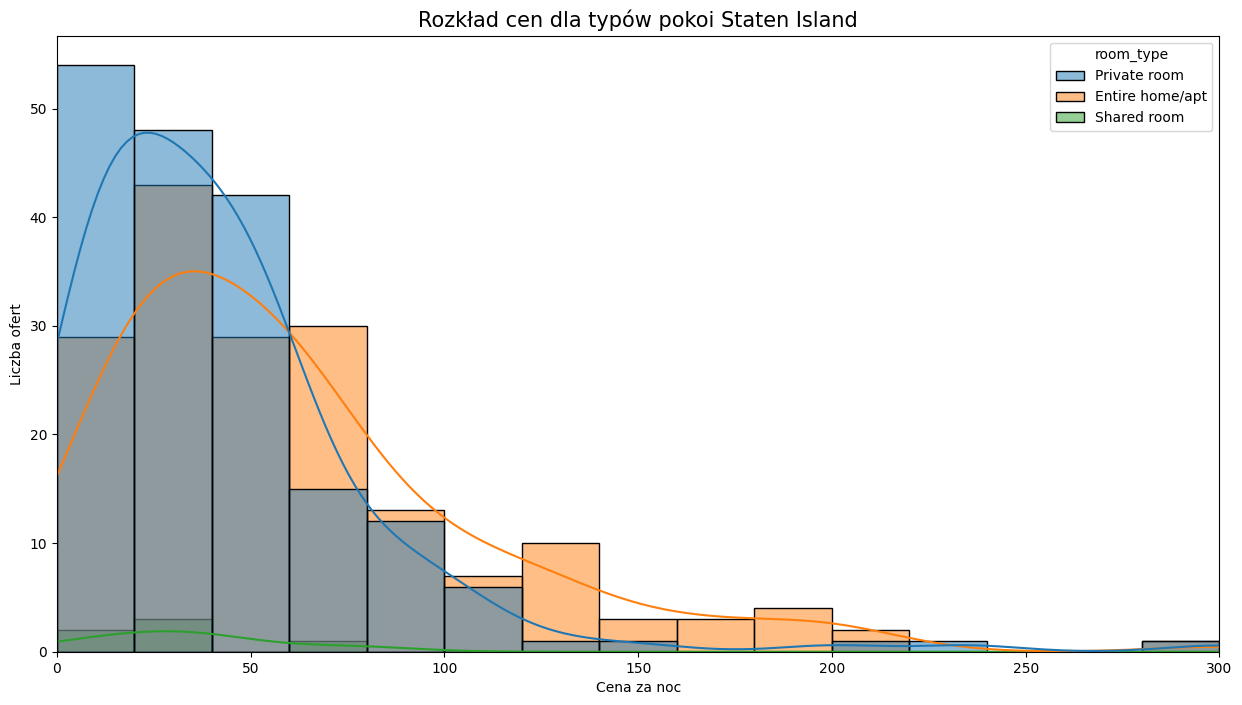

In [79]:
sub=df[df.neighbourhood_group == "Staten Island"]
sub=sub[sub.price_per_night <= 500]
plt.figure(figsize=(15,8))
plt.margins(x=0)
plt.title('Rozkład cen dla typów pokoi Staten Island', fontsize=15)
plt.xlabel('Cena za noc')
plt.ylabel("Liczba ofert")
sns.histplot(data=sub, x="price_per_night", hue="room_type", kde=True, binwidth=20)

Staten Island ma bardzo podobną krzywą do okręgu Queens, jednak przewaga liczby ofert apartamentów nad prywatnymi pokojami zaczyna przewyższać już od ceny około 60$ za noc.

### Bronx

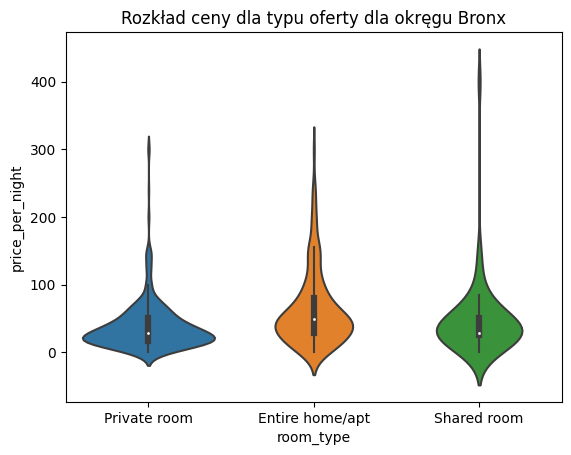

In [80]:
sub=n_df_Bronx[n_df_Bronx.price_per_night <= 500]
viol=sns.violinplot(data=sub, x='room_type', y='price_per_night').set(title="Rozkład ceny dla typu oferty dla okręgu Bronx")

In [81]:
#room Type
sub_1=n_df_Bronx.loc[n_df_Bronx['room_type'] == 'Private room']
price_per_night_sub1=sub_1[['price_per_night']]

sub_1=n_df_Bronx.loc[n_df_Bronx['room_type'] == 'Entire home/apt']
price_per_night_sub1=sub_1[['price_per_night']]

sub_1=n_df_Bronx.loc[n_df_Bronx['room_type'] == 'Shared room']
price_per_night_sub1=sub_1[['price_per_night']]


price_per_night_list_by_n=[price_per_night_sub1, price_per_night_sub2, price_per_night_sub3]

In [82]:
data_table=[]
name_list=['Private room', 'Entire home/apt', 'Shared room']

for x in price_per_night_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Bronx'}, inplace=True)
    data_table.append(i)
    

#Zmiana nazw w celu łatwiejszego odczytania nazw okręgów 
   
for i in range(3):
    data_table[i].rename(columns={'price_per_night':name_list[i]}, inplace=True)  
data_table=[df.set_index('Bronx') for df in data_table]
data_table=data_table[0].join(data_table[1:])
data_table

,Private room,Entire home/apt,Shared room
Bronx,,,
min,0.00,0.0,0.0
25%,26.00,20.0,21.0
50%,29.00,50.0,43.0
75%,51.25,100.0,70.0
max,400.00,7703.0,2000.0


<AxesSubplot: title={'center': 'Rozkład cen dla typów pokoi Bronx'}, xlabel='Cena za noc', ylabel='Liczba ofert'>

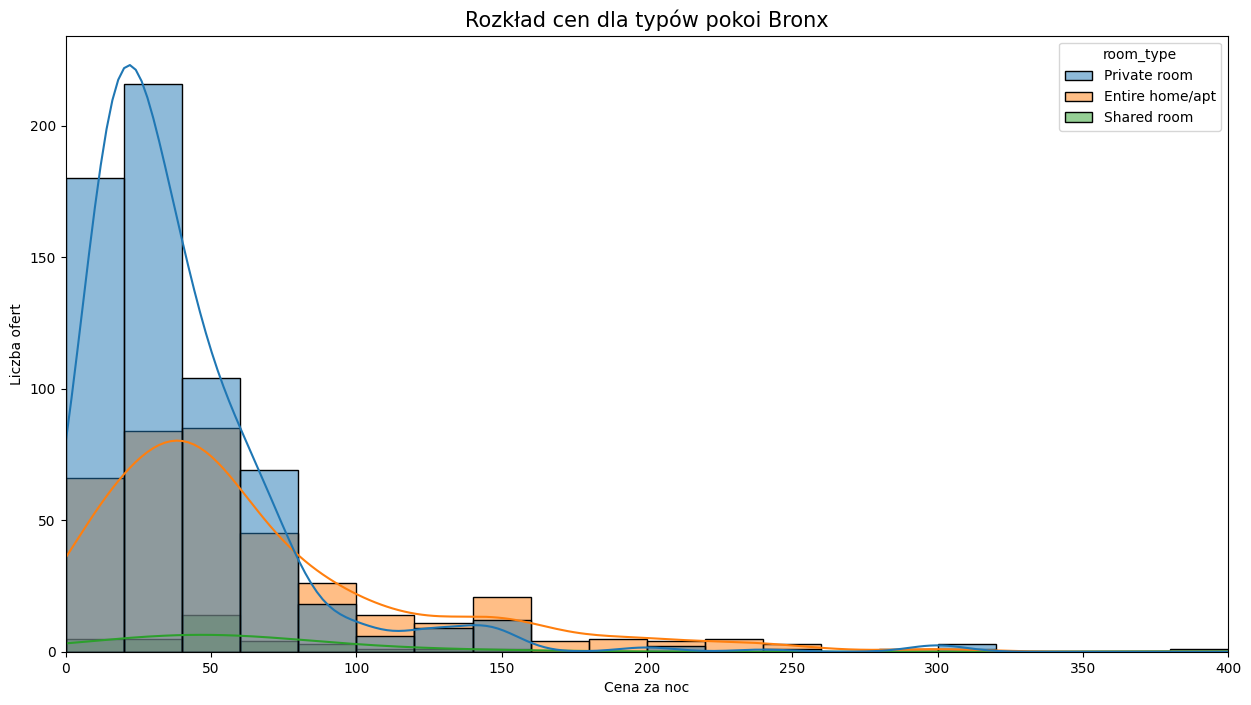

In [83]:
sub=df[df.neighbourhood_group == "Bronx"]
sub=sub[sub.price_per_night <= 500]
plt.figure(figsize=(15,8))
plt.margins(x=0)
plt.title('Rozkład cen dla typów pokoi Bronx', fontsize=15)
plt.xlabel('Cena za noc')
plt.ylabel("Liczba ofert")
sns.histplot(data=sub, x="price_per_night", hue="room_type", kde=True, binwidth=20)

W okręgu Bronx przeważająca liczba ofert mieszkaniowych do wynajęcia ma cenę za noc mniejszą niz 80$, co prowadzi do wniosku, że w tej dzielnicy jest mało luksusowych apartamentów i drogich pokojów.

### Opisy

Widzimy, że niektóre ogłoszenia nie wymagają inwestycji pieniężnej w celu znalezienia noclegu (przynajmniej jest to prawdą na Brooklynie, Manhattanie oraz Bronxie). 

Kolejne progi procentowe powoli pozwalają nam na określenie gdzie mieszkanie będzie bardziej lub mniej pożądane. Już przy 25% widzimy znaczną różnicę, gdzie na Manhattan'ie zapłacimy ponad dwukrotność mieszkania na Bronx'ie! Nie ma tutaj mowy o standardzie danego pokoju, dlatego też ciężko ocenić czy ta różnica wynika tylko i wyłącznie z umiejscowienia geograficznego. Na ten fakt z pewnością wpływa również to, że ogłoszeń na okręgach Queens, Staten Island oraz Bronx jest blisko 3-krotnie mniej sumarycznie niż na samym Manhattan'ie.

Kolejne progi tylko ugruntowują statystykę, że najdroższym miejscem do skorzystania z serwisu AirBnB jest Manhattan, następnie ze sporą różnicą uplasował się Brooklyn, później przy takich samych wynikach widzimy Queens oraz Staten Island, a Bronx pomimo swojego położenia stosunkowo blisko Manhattanu, okazał się najtańszy. 

Maksymalne ogłoszenie w każdym z okręgów uplasowało się znacznie wyżej niż pozostałe, ale ponownie widzimy tutaj znacznie niższą cenę na Bronx'ie, co tylko utwierdza wcześniej wysunięty wniosek.

## Mapa Nowego Jorku

Na mapie Nowego Jorku zostały narzucone koordynaty wszystkich obiektów dostępnych na wynajem z naszej bazy danych. Przedstawione zostały w formie mapy cieplnej, która charakteryzuje się coraz intensywniejszym kolorem w zależności od liczby mieszkań w tej okolicy. 

Wnioski z tej mapy pokrywają się w wizualny sposób z poprzednimi badaniami. Widzimy tutaj, że na Staten Island liczba mieszkań jest bardzo mała, a większość z nich jest umiejscowiona niedaleko mostu łączącego ją z Brooklyn'em. Podobną charakterystyką można opisać Bronx oraz Queens, chociaż w tych przypadkach odległość dzieląca mieszkania jest większa, ponieważ nie są tak scentralizowane jak na Staten Island. 

Drugą pod względem liczby dostępnych na wynajem mieszkań jest Brooklyn. Widzimy tutaj znacznie większe zagęszczenie w porównaniu do poprzednich okręgów. Liczba mieszkań rośnie odwrotnie proporcjonalnie do odległości od Manhattanu, gdzie pomimo mniejszej powierzchni od pozostałych hrabstw, widzimy czerwone punkty na mapie oraz nieprzerwaną falę pomarańczowego koloru na około central parku. Zgadza się to z założeniem, że Manhattan jest najsławniejszym oraz najbogatszym okręgiem z badanych, dlatego też ludzie z pewnością są bardziej skłonni właśnie tam pozostać na noc.

In [84]:
map = folium.Map([40.7128,-74.0060],zoom_start=11)
folium.plugins.HeatMap(df[['latitude','longitude']].dropna(),
                       radius=8, gradient={0.1:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(map)
display(map)

## Predykcja ceny obiektu na wynajem

Ostatnim etapem naszej pracy będzie próba predykcji ceny na podstawie różnych parametrów dostępnych w naszej bazie danych. Ich dobór będzie określany na podstawie metody prób i błędów podczas pracy z wieloma różnymi metodami. Pierwszym krokiem jest transformacja potrzebnych danych z formy ciągu znaków do binarnej. 

In [85]:
room_type = le.fit_transform(df["room_type"])

df["neighbourhood"] = df["neighbourhood"].map(dzielnica_mapping)
df["neighbourhood_group"] = df["neighbourhood_group"].map(hrabstwo_mapping)

Przechodząc do zaimplementowanej predykcji, do trenowania naszego modelu wykorzystujemy kilka parametrów, a mianowicie: 
- długość geograficzną,
- szerokość geograficzną,
- okręg,
- dzielnica w okręgu,
- typ wynajmowanego obiektu.

Poszukiwanym parametrem jest cena całościowa.

Podział na zbiór testowy zawiera w sobie 10% wszystkich danych, natomiast zbiór trenujący to pozostałe 90%.

Jako bazowy model wybraliśmy regresor K-najbliższych sąsiadów i to do niego będziemy porównywać w przyszłości kolejne alternatywne rozwiązania.

Ze względu na fakt, że rozstrzał cenowy jest dość spory, wykonujemy 50 osobnych predykcji (liczba osiągnięta na podstawie stabilnego wyniku po kilku próbach) i metryką oceniającą działanie naszego modelu będzie średnia z tych wszystkich zapisanych błędów średniokwadratowych (już spierwiastkowany w celu łatwiejszego odczytu).

In [86]:
x = list(
    zip(
        df["longitude"],
        df["latitude"],
        df["neighbourhood"],
        df["neighbourhood_group"],
        room_type,
    )
)

y = list(df["price"])


amount_to_test = 50
acc = []
for _ in range(amount_to_test):
    x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.1)
    model = KNeighborsRegressor(n_neighbors=5)
    model.fit(x_train, y_train)
    predicted = model.predict(x_test)
    acc.append(mean_squared_error(y_test, predicted, squared=False))
print(f"Średni błąd kwadratowy (spierwiastkowane): ${sum(acc)/len(acc):.2f}")

Średni błąd kwadratowy (spierwiastkowane): $232.63


Średni błąd kwadratowy (spierwiastkowany) wynosi około $240. Z tej wartości możemy wywnioskować, że tak duży błąd może być spowodowany wykorzystaniem wartości skrajnych, które wydają się zawierać w sobie błędne lub mylne wartości. Rozwiązaniem tego problemu może być ograniczenie danych, które powinny być brane pod uwagę podczas procesu uczenia.